<a href="https://colab.research.google.com/github/m677s345/EECS_731_SEMESTER_PROJECT_TRENDING/blob/main/EECS_731__Semester_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install cookiecutter
!cookiecutter https://github.com/drivendata/cookiecutter-data-science

     |████████████████████████████████| 51kB 2.5MB/s 
project_name [project_name]: 
repo_name [project_name]: 
author_name [Your name (or your organization/company/team)]: 
description [A short description of the project.]: 
Select open_source_license:
1 - MIT
2 - BSD-3-Clause
3 - No license file
Choose from 1, 2, 3 [1]: 
s3_bucket [[OPTIONAL] your-bucket-for-syncing-data (do not include 's3://')]: 
aws_profile [default]: 
Select python_interpreter:
1 - python3
2 - python
Choose from 1, 2 [1]: 


# Packages and Data Cleaning 

In [2]:
# libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib as mpl
from matplotlib import rcParams
import collections
import os
from subprocess import check_output
from wordcloud import WordCloud, STOPWORDS
import string
import re 
import nltk
from nltk.corpus import stopwords
from nltk import pos_tag
from nltk.stem.wordnet import WordNetLemmatizer 
from nltk.tokenize import word_tokenize
from nltk.tokenize import TweetTokenizer

In [4]:
#Plot settings
SMALL_SIZE = 10
MEDIUM_SIZE = 12
BIGGER_SIZE = 14

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

In [6]:
df = pd.read_csv("/content/project_name/data/raw/US_youtube_trending_data.csv",header=0)

In [ ]:
df.head()

,video_id,title,publishedAt,channelId,channelTitle,categoryId,trending_date,tags,view_count,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,description
0,3C66w5Z0ixs,I ASKED HER TO BE MY GIRLFRIEND...,2020-08-11T19:20:14Z,UCvtRTOMP2TqYqu51xNrqAzg,Brawadis,22,2020-08-12T00:00:00Z,brawadis|prank|basketball|skits|ghost|funny vi...,1514614,156908,5855,35313,https://i.ytimg.com/vi/3C66w5Z0ixs/default.jpg,False,False,SUBSCRIBE to BRAWADIS ▶ http://bit.ly/Subscrib...
1,M9Pmf9AB4Mo,Apex Legends | Stories from the Outlands – “Th...,2020-08-11T17:00:10Z,UC0ZV6M2THA81QT9hrVWJG3A,Apex Legends,20,2020-08-12T00:00:00Z,Apex Legends|Apex Legends characters|new Apex ...,2381688,146739,2794,16549,https://i.ytimg.com/vi/M9Pmf9AB4Mo/default.jpg,False,False,"While running her own modding shop, Ramya Pare..."
2,J78aPJ3VyNs,I left youtube for a month and THIS is what ha...,2020-08-11T16:34:06Z,UCYzPXprvl5Y-Sf0g4vX-m6g,jacksepticeye,24,2020-08-12T00:00:00Z,jacksepticeye|funny|funny meme|memes|jacksepti...,2038853,353787,2628,40221,https://i.ytimg.com/vi/J78aPJ3VyNs/default.jpg,False,False,I left youtube for a month and this is what ha...
3,kXLn3HkpjaA,XXL 2020 Freshman Class Revealed - Official An...,2020-08-11T16:38:55Z,UCbg_UMjlHJg_19SZckaKajg,XXL,10,2020-08-12T00:00:00Z,xxl freshman|xxl freshmen|2020 xxl freshman|20...,496771,23251,1856,7647,https://i.ytimg.com/vi/kXLn3HkpjaA/default.jpg,False,False,Subscribe to XXL → http://bit.ly/subscribe-xxl...
4,VIUo6yapDbc,Ultimate DIY Home Movie Theater for The LaBran...,2020-08-11T15:10:05Z,UCDVPcEbVLQgLZX0Rt6jo34A,Mr. Kate,26,2020-08-12T00:00:00Z,The LaBrant Family|DIY|Interior Design|Makeove...,1123889,45802,964,2196,https://i.ytimg.com/vi/VIUo6yapDbc/default.jpg,False,False,Transforming The LaBrant Family's empty white ...


In [7]:
df.columns

Index(['video_id', 'title', 'publishedAt', 'channelId', 'channelTitle',
       'categoryId', 'trending_date', 'tags', 'view_count', 'likes',
       'dislikes', 'comment_count', 'thumbnail_link', 'comments_disabled',
       'ratings_disabled', 'description'],
      dtype='object')

In [8]:
df.drop('comments_disabled',1,inplace=True)
df.drop('ratings_disabled',1,inplace=True)
df.drop('thumbnail_link',1,inplace=True)

In [9]:
print(df.shape)
print(df.nunique())

(14198, 13)
video_id          2963
title             3029
publishedAt       2891
channelId         1526
channelTitle      1529
categoryId          15
trending_date       71
tags              2552
view_count       14145
likes            13451
dislikes          5193
comment_count     9192
description       3176
dtype: int64


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14198 entries, 0 to 14197
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   video_id       14198 non-null  object
 1   title          14198 non-null  object
 2   publishedAt    14198 non-null  object
 3   channelId      14198 non-null  object
 4   channelTitle   14198 non-null  object
 5   categoryId     14198 non-null  int64 
 6   trending_date  14198 non-null  object
 7   tags           14198 non-null  object
 8   view_count     14198 non-null  int64 
 9   likes          14198 non-null  int64 
 10  dislikes       14198 non-null  int64 
 11  comment_count  14198 non-null  int64 
 12  description    14130 non-null  object
dtypes: int64(5), object(8)
memory usage: 1.4+ MB


In [11]:
df.drop('description',1,inplace=True)


In [12]:
# Check any number of columns with NaN
print(df.isnull().any().sum(), ' / ', len(df.columns))
# Check any number of data points with NaN
print(df.isnull().any(axis=1).sum(), ' / ', len(df))

0  /  12
0  /  14198


In [13]:
df['publishedAt']=pd.to_datetime(df['publishedAt'])
df['trending_date']=pd.to_datetime(df['trending_date'])

In [14]:
df.dtypes

video_id                      object
title                         object
publishedAt      datetime64[ns, UTC]
channelId                     object
channelTitle                  object
categoryId                     int64
trending_date    datetime64[ns, UTC]
tags                          object
view_count                     int64
likes                          int64
dislikes                       int64
comment_count                  int64
dtype: object

In [15]:
df['publishedAt'].sort_values(ascending=False)
df.duplicated(subset=['video_id'],keep='first')
df.drop_duplicates(subset=['video_id'],keep='first')

,video_id,title,publishedAt,channelId,channelTitle,categoryId,trending_date,tags,view_count,likes,dislikes,comment_count
0,3C66w5Z0ixs,I ASKED HER TO BE MY GIRLFRIEND...,2020-08-11 19:20:14+00:00,UCvtRTOMP2TqYqu51xNrqAzg,Brawadis,22,2020-08-12 00:00:00+00:00,brawadis|prank|basketball|skits|ghost|funny vi...,1514614,156908,5855,35313
1,M9Pmf9AB4Mo,Apex Legends | Stories from the Outlands – “Th...,2020-08-11 17:00:10+00:00,UC0ZV6M2THA81QT9hrVWJG3A,Apex Legends,20,2020-08-12 00:00:00+00:00,Apex Legends|Apex Legends characters|new Apex ...,2381688,146739,2794,16549
2,J78aPJ3VyNs,I left youtube for a month and THIS is what ha...,2020-08-11 16:34:06+00:00,UCYzPXprvl5Y-Sf0g4vX-m6g,jacksepticeye,24,2020-08-12 00:00:00+00:00,jacksepticeye|funny|funny meme|memes|jacksepti...,2038853,353787,2628,40221
3,kXLn3HkpjaA,XXL 2020 Freshman Class Revealed - Official An...,2020-08-11 16:38:55+00:00,UCbg_UMjlHJg_19SZckaKajg,XXL,10,2020-08-12 00:00:00+00:00,xxl freshman|xxl freshmen|2020 xxl freshman|20...,496771,23251,1856,7647
4,VIUo6yapDbc,Ultimate DIY Home Movie Theater for The LaBran...,2020-08-11 15:10:05+00:00,UCDVPcEbVLQgLZX0Rt6jo34A,Mr. Kate,26,2020-08-12 00:00:00+00:00,The LaBrant Family|DIY|Interior Design|Makeove...,1123889,45802,964,2196
...,...,...,...,...,...,...,...,...,...,...,...,...
14082,_qOuVkFaUZg,#89 Khabib Nurmagomedov | Real Quick With Mike...,2020-10-19 14:31:30+00:00,UCxY3IbiquwT3QjrgIgg86KQ,Real Quick With Mike Swick Podcast,24,2020-10-21 00:00:00+00:00,Real Quick with Mike Swick|AKA Thailand|Podcas...,140867,6247,83,1711
14083,W7kFGGFI9Xo,DIEHARD IS BACK | 2:00 Film,2020-10-18 20:35:18+00:00,UCayVu430iDHT0FNIB-3-hoQ,Advance Auto Parts,2,2020-10-21 00:00:00+00:00,die hard|diehard|diehardisback|cars|movies,652879,6415,355,603
14095,xVIfx8UR4Fo,10 Things You Didn’t Know About Justin Gaethje!,2020-10-19 13:30:07+00:00,UCNxIH_iATJ8CjsXx3m7jXvg,Watch MMA,17,2020-10-21 00:00:00+00:00,ufc|ufc today|justin gaethje|gaethje|gaethje v...,167237,4324,324,650
14124,9sa5xtyWcYU,Dead by Daylight | The Realm Beyond | Part 2,2020-10-20 15:00:06+00:00,UCaSgsFdGbwjfdawl3rOXiwQ,Dead by Daylight,20,2020-10-21 00:00:00+00:00,dead by daylight|dbd|behaviour interactive|bhv...,124436,11794,110,1188


In [16]:
print (df['trending_date'].min())
print (df['trending_date'].max())

2020-08-12 00:00:00+00:00
2020-10-21 00:00:00+00:00


# Data Visualization

In [17]:
df['likes_log'] = np.log(df['likes']+1)
df['views_log'] = np.log(df['view_count'] +1)
df['dislikes_log'] = np.log(df['dislikes'] +1)
df['comment_count_log'] = np.log(df['comment_count']+1)

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

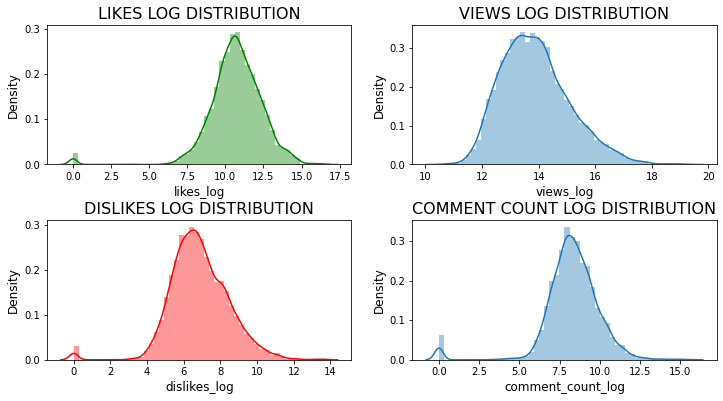

In [18]:
plt.figure(figsize = (12,6))
plt.subplot(221)
g1 = sns.distplot(df['likes_log'], color = 'green')
g1.set_title("LIKES LOG DISTRIBUTION", fontsize = 16)

plt.subplot(222)
g2 = sns.distplot(df['views_log'])
g2.set_title("VIEWS LOG DISTRIBUTION", fontsize = 16)

plt.subplot(223)
g3 = sns.distplot(df['dislikes_log'], color = 'r')
g3.set_title("DISLIKES LOG DISTRIBUTION", fontsize=16)

plt.subplot(224)
g4 = sns.distplot(df['comment_count_log'])
g4.set_title("COMMENT COUNT LOG DISTRIBUTION", fontsize=16)

plt.subplots_adjust(wspace = 0.2, hspace = 0.4, top = 0.9)

plt.show()

In [19]:
np.unique(df["categoryId"])

array([ 1,  2, 10, 15, 17, 19, 20, 22, 23, 24, 25, 26, 27, 28, 29])

In [20]:
df['category_name'] = np.nan

df.loc[(df['categoryId'] == 1),  "category_name"] = 'Film and Animation'
df.loc[(df['categoryId'] == 2),  "category_name"] = 'Cars and Vehicles'
df.loc[(df['categoryId'] == 10), "category_name"] = 'Music'
df.loc[(df['categoryId'] == 15), "category_name"] = 'Pet and Animals'
df.loc[(df['categoryId'] == 17), "category_name"] = 'Sports'
df.loc[(df['categoryId'] == 19), "category_name"] = 'Travel and Events'
df.loc[(df['categoryId'] == 20), "category_name"] = 'Gaming'
df.loc[(df['categoryId'] == 22), "category_name"] = 'People and Blogs'
df.loc[(df['categoryId'] == 23), "category_name"] = 'Comedy'
df.loc[(df['categoryId'] == 24), "category_name"] = 'Entertainment'
df.loc[(df['categoryId'] == 25), "category_name"] = 'News and Politics'
df.loc[(df['categoryId'] == 26), "category_name"] = 'How to and Style'
df.loc[(df['categoryId'] == 27), "category_name"] = 'Education'
df.loc[(df['categoryId'] == 28), "category_name"] = 'Science and Technology'
df.loc[(df['categoryId'] == 29), "category_name"] = 'Non-profits and Activism'
df.loc[(df['categoryId'] == 43), "category_name"] = 'Shows'

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


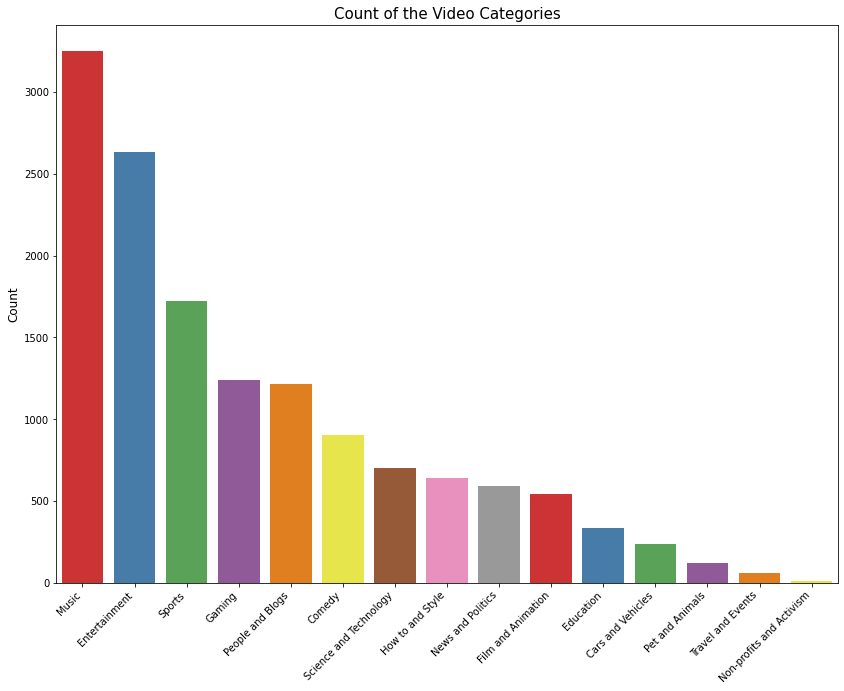

In [21]:
plt.figure(figsize = (14,10))
g = sns.countplot('category_name', data = df, palette="Set1", order = df['category_name'].value_counts().index)
g.set_xticklabels(g.get_xticklabels(),rotation=45, ha="right")
g.set_title("Count of the Video Categories", fontsize=15)
g.set_xlabel("", fontsize=12)
g.set_ylabel("Count", fontsize=12)
plt.subplots_adjust(wspace = 0.9, hspace = 0.9, top = 0.9)
plt.show()

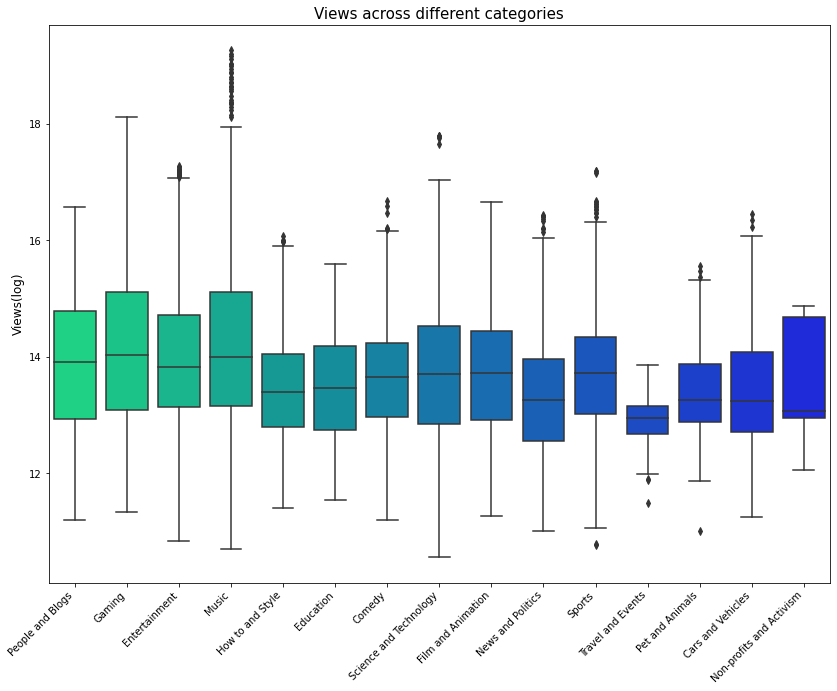

In [22]:
plt.figure(figsize = (14,10))
g = sns.boxplot(x = 'category_name', y = 'views_log', data = df, palette="winter_r")
g.set_xticklabels(g.get_xticklabels(),rotation=45, ha="right")
g.set_title("Views across different categories", fontsize=15)
g.set_xlabel("", fontsize=12)
g.set_ylabel("Views(log)", fontsize=12)
plt.subplots_adjust(wspace = 0.9, hspace = 0.9, top = 0.9)
plt.show()

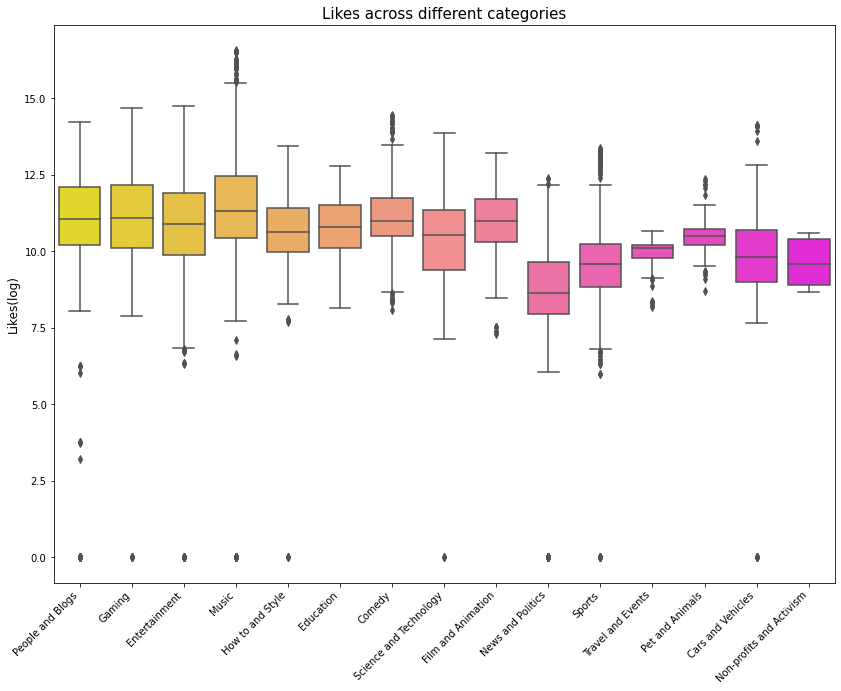

In [23]:
plt.figure(figsize = (14,10))
g = sns.boxplot(x = 'category_name', y = 'likes_log', data = df, palette="spring_r")
g.set_xticklabels(g.get_xticklabels(),rotation=45, ha="right")
g.set_title("Likes across different categories", fontsize=15)
g.set_xlabel("", fontsize=12)
g.set_ylabel("Likes(log)", fontsize=12)
plt.subplots_adjust(wspace = 0.9, hspace = 0.9, top = 0.9)
plt.show()

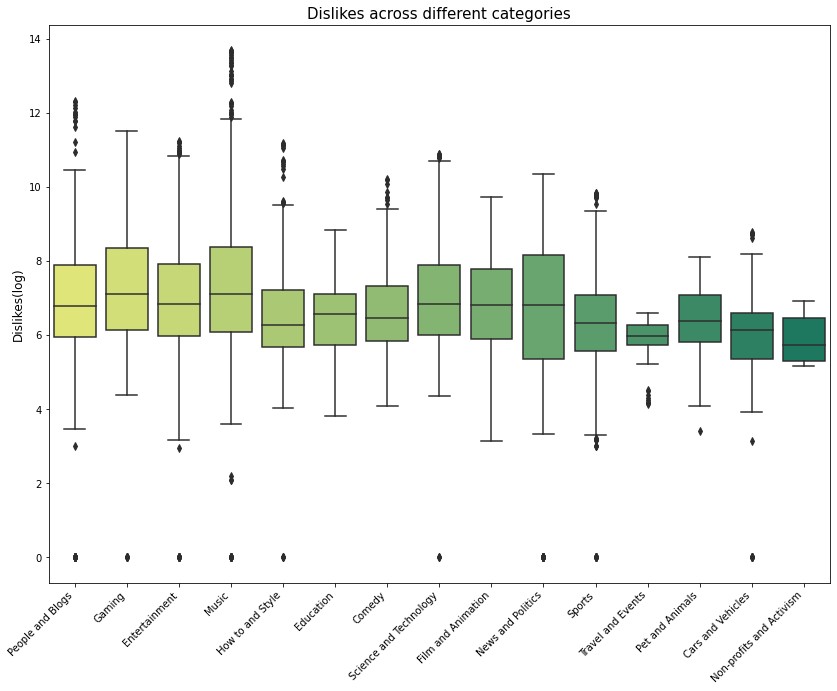

In [24]:
plt.figure(figsize = (14,10))
g = sns.boxplot(x = 'category_name', y = 'dislikes_log', data = df, palette="summer_r")
g.set_xticklabels(g.get_xticklabels(),rotation=45, ha="right")
g.set_title("Dislikes across different categories", fontsize=15)
g.set_xlabel("", fontsize=12)
g.set_ylabel("Dislikes(log)", fontsize=12)
plt.subplots_adjust(wspace = 0.9, hspace = 0.9, top = 0.9)
plt.show()

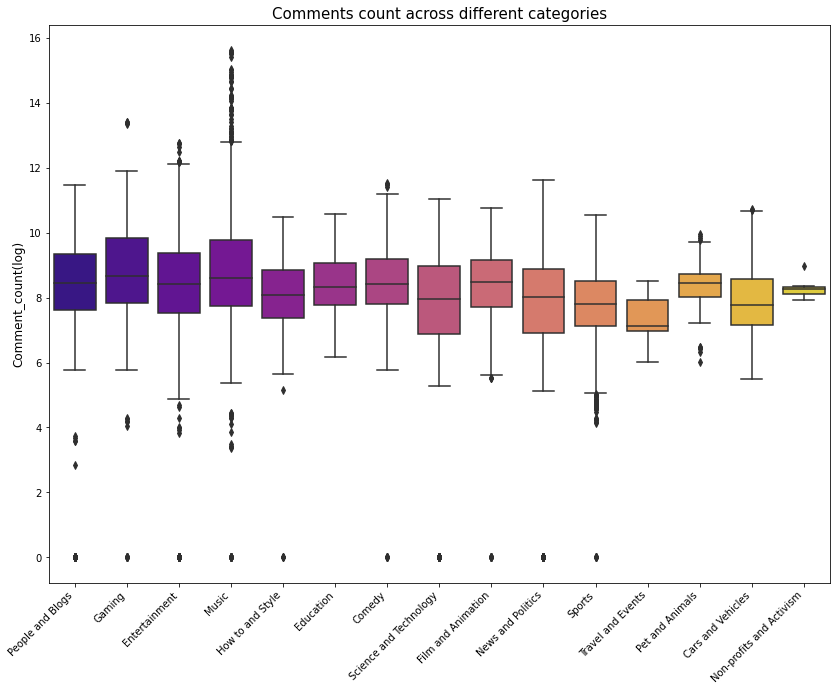

In [25]:
plt.figure(figsize = (14,10))
g = sns.boxplot(x = 'category_name', y = 'comment_count_log', data = df, palette="plasma")
g.set_xticklabels(g.get_xticklabels(),rotation=45, ha="right")
g.set_title("Comments count across different categories", fontsize=15)
g.set_xlabel("", fontsize=12)
g.set_ylabel("Comment_count(log)", fontsize=12)
plt.subplots_adjust(wspace = 0.9, hspace = 0.9, top = 0.9)
plt.show()

In [26]:
df['like_rate'] = df['likes']/df['view_count']
df['dislike_rate'] = df['dislikes']/df['view_count']
df['comment_rate'] = df['comment_count']/df['view_count']

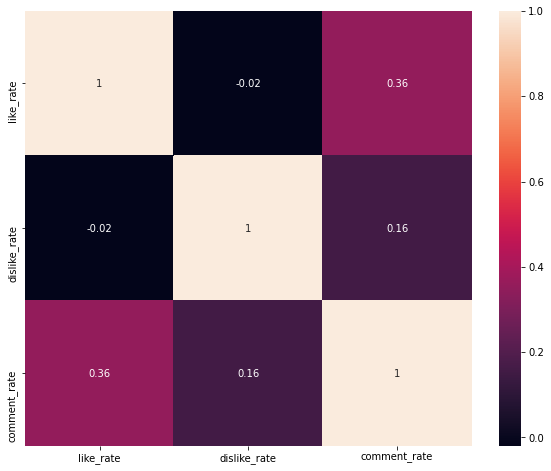

In [27]:
plt.figure(figsize = (10,8))
sns.heatmap(df[['like_rate', 'dislike_rate', 'comment_rate']].corr(), annot=True)
plt.show()

In [28]:
#Word count 
df['count_word']=df['title'].apply(lambda x: len(str(x).split()))
df['count_word_tags']=df['tags'].apply(lambda x: len(str(x).split()))

#Unique word count
df['count_unique_word'] = df['title'].apply(lambda x: len(set(str(x).split())))
df['count_unique_word_tags'] = df['tags'].apply(lambda x: len(set(str(x).split())))

#Punctutation count
df['count_punctuation'] = df['title'].apply(lambda x: len([c for c in str(x) if c in string.punctuation]))
df['count_punctuation_tags'] = df['tags'].apply(lambda x: len([c for c in str(x) if c in string.punctuation]))

#Average length of the words
df['mean_word_len'] = df['title'].apply(lambda x : np.mean([len(x) for x in str(x).split()]))
df['mean_word_len_tags'] = df['tags'].apply(lambda x: np.mean([len(x) for x in str(x).split()]))

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axe

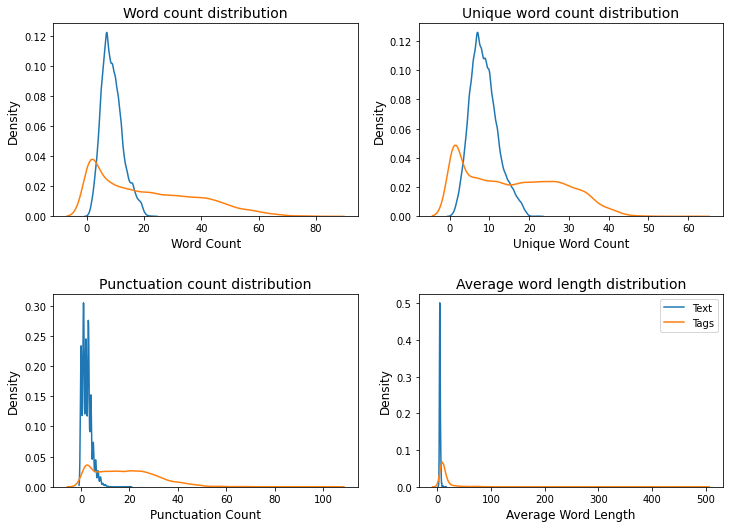

In [29]:
plt.figure(figsize = (12,18))

plt.subplot(421)
g1 = sns.distplot(df['count_word'],
                 hist = False, label = 'Text')
g1 = sns.distplot(df['count_word_tags'],
                 hist = False, label = 'Tags')
g1.set_title('Word count distribution', fontsize = 14)
g1.set(xlabel='Word Count')

plt.subplot(422)
g2 = sns.distplot(df['count_unique_word'],
                 hist = False, label = 'Text')
g2 = sns.distplot(df['count_unique_word_tags'],
                 hist = False, label = 'Tags')
g2.set_title('Unique word count distribution', fontsize = 14)
g2.set(xlabel='Unique Word Count')

plt.subplot(423)
g3 = sns.distplot(df['count_punctuation'],
                 hist = False, label = 'Text')
g3 = sns.distplot(df['count_punctuation_tags'],
                 hist = False, label = 'Tags')
g3.set_title('Punctuation count distribution', fontsize =14)
g3.set(xlabel='Punctuation Count')

plt.subplot(424)
g4 = sns.distplot(df['mean_word_len'],
                 hist = False, label = 'Text')
g4 = sns.distplot(df['mean_word_len_tags'],
                 hist = False, label = 'Tags')
g4.set_title('Average word length distribution', fontsize = 14)
g4.set(xlabel = 'Average Word Length')

plt.subplots_adjust(wspace = 0.2, hspace = 0.4, top = 0.9)
plt.legend()
plt.show()

# Title and tag specific visuialization and frequency analysis 

In [30]:
def grey_color_func(word, font_size, position, orientation, random_state=None,
                    **kwargs):
    return "hsl(0, 0%%, %d%%)" % random.randint(40, 200)

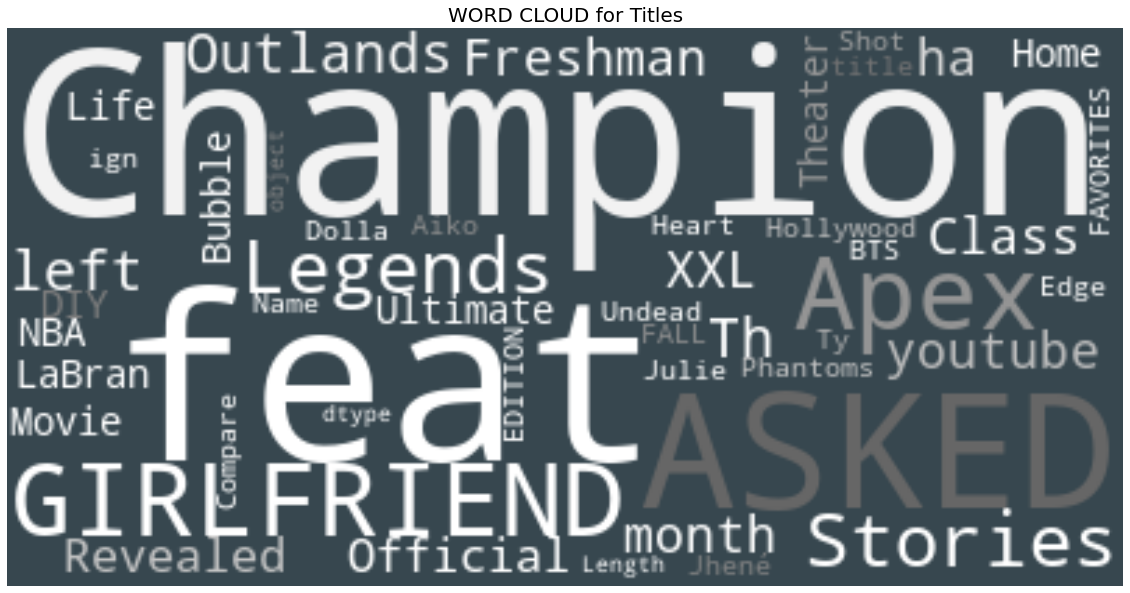

In [31]:
import os
import random
plt.figure(figsize = (20,20))
stopwords = set(STOPWORDS)
wordcloud = WordCloud(
                      background_color = '#37474fff',
                      stopwords=stopwords,
                      max_words = 1000,
                      max_font_size = 120,
                      random_state = 42
                    ).generate(str(df['title']))

#Plotting the word cloud
default_colors = wordcloud.to_array(),
plt.imshow(wordcloud.recolor(color_func=grey_color_func, random_state=3),interpolation="bilinear")
plt.title("WORD CLOUD for Titles", fontsize = 20)
plt.axis('off')
plt.show()

In [32]:
all_titles = ' '.join(df['title'].str.lower())

import re

def tokens(text):
    "List all the word tokens in a text."
    return re.findall('[\w]+', text.lower())
new_titles=tokens(all_titles)


filtered_words = [word for word in new_titles if word not in stopwords]
counted_words = collections.Counter(filtered_words)

words = []
counts = []
for letter, count in counted_words.most_common(50):
    words.append(letter)
    counts.append(count)

<BarContainer object of 50 artists>

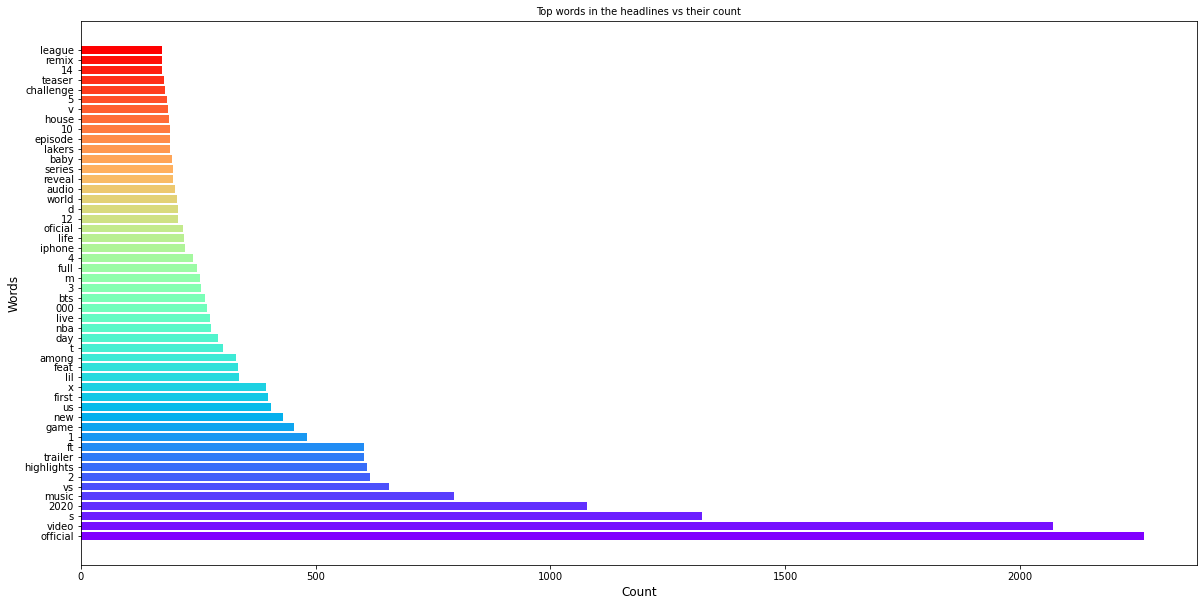

In [33]:
colors = cm.rainbow(np.linspace(0, 1, 50))
rcParams['figure.figsize'] = 20, 10

plt.title('Top words in the headlines vs their count')
plt.xlabel('Count')
plt.ylabel('Words')
plt.barh(words, counts, color=colors)

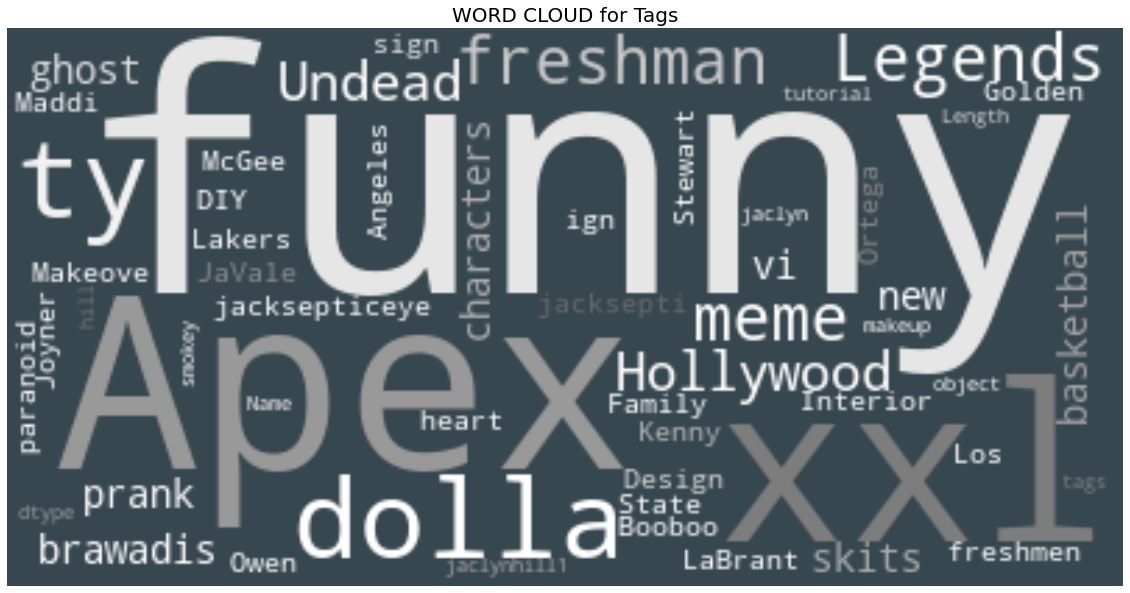

In [34]:
plt.figure(figsize = (20,20))

stopwords = set(STOPWORDS)

wordcloud = WordCloud(
                      background_color = '#37474fff',
                      stopwords = stopwords,
                      max_words = 1000,
                      max_font_size = 120,
                      random_state = 42
                    ).generate(str(df['tags']))

#Plotting the word cloud
default_colors = wordcloud.to_array(),
plt.imshow(wordcloud.recolor(color_func=grey_color_func, random_state=3),interpolation="bilinear")
plt.title("WORD CLOUD for Tags", fontsize = 20)
plt.axis('off')
plt.show()


In [35]:
all_tags = ' '.join(df['tags'].str.lower())

import re

def tokens(text):
    "List all the word tokens in a text."
    return re.findall('[\w]+', text.lower())
new_tags=tokens(all_tags)


filtered_words = [word for word in new_tags if word not in stopwords]
counted_words = collections.Counter(filtered_words)

tag_words = []
tag_counts = []
for letter, count in counted_words.most_common(50):
    tag_words.append(letter)
    tag_counts.append(count)

<BarContainer object of 50 artists>

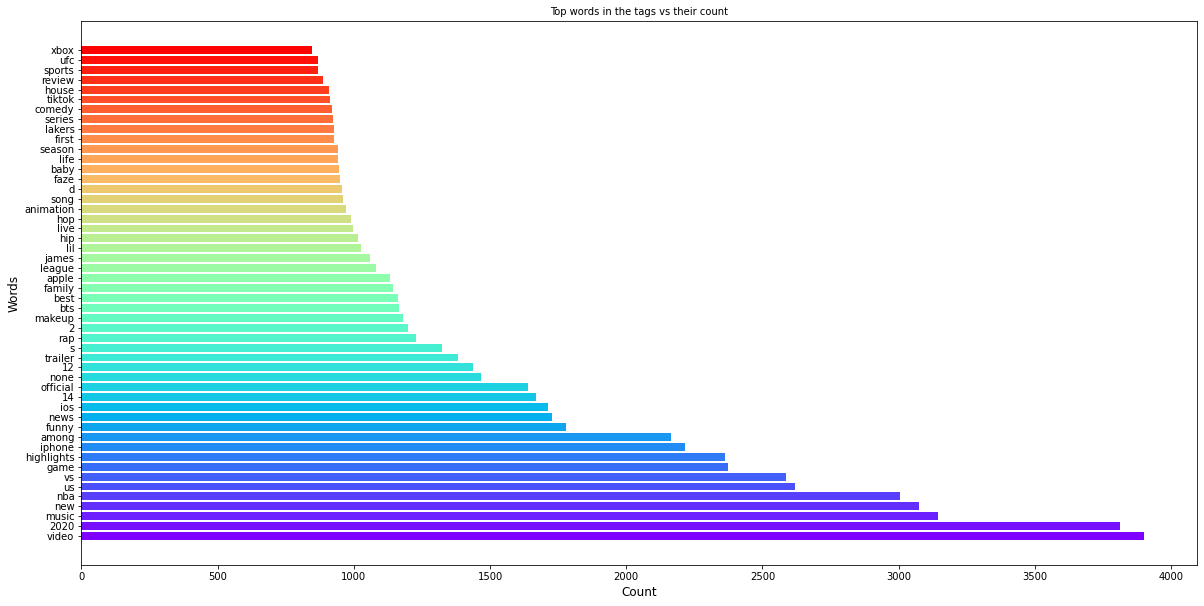

In [36]:
colors = cm.rainbow(np.linspace(0, 1, 50))
rcParams['figure.figsize'] = 20, 10

plt.title('Top words in the tags vs their count')
plt.xlabel('Count')
plt.ylabel('Words')
plt.barh(tag_words, tag_counts, color=colors)

In [37]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
split_tags=df.tags.str.split('|', expand=False) #splits the string based on |
print(split_tags)

df['tags']=split_tags



0        [brawadis, prank, basketball, skits, ghost, fu...
1        [Apex Legends, Apex Legends characters, new Ap...
2        [jacksepticeye, funny, funny meme, memes, jack...
3        [xxl freshman, xxl freshmen, 2020 xxl freshman...
4        [The LaBrant Family, DIY, Interior Design, Mak...
                               ...                        
14193    [JaVale McGee, Los Angeles Lakers, Golden Stat...
14194    [Hollywood Undead, hollywood undead heart of a...
14195    [ty dolla $ign, ty dolla sign paranoid, ty dol...
14196    [Kenny Ortega, Booboo Stewart, Owen Joyner, Ma...
14197    [jaclynhill1, jaclyn hill, makeup tutorial, sm...
Name: tags, Length: 14198, dtype: object


# Google trends API

In [38]:
!pip install pytrends


In [39]:
import pandas as pd
from pytrends.request import TrendReq
pytrend = TrendReq(hl='en-US', tz=360)

**timeframe**

Date to start from

Defaults to last 5yrs, 'today 5-y'.

Everything 'all'

Specific dates, 'YYYY-MM-DD YYYY-MM-DD' example '2016-12-14 2017-01-25'

Specific datetimes, 'YYYY-MM-DDTHH YYYY-MM-DDTHH' example '2017-02-06T10 2017-02-12T07'

Note Time component is based off UTC
Current Time Minus Time Pattern:

By Month: 'today #-m' where # is the number of months from that date to pull data for

For example: 'today 3-m' would get data from today to 3months ago
NOTE Google uses UTC date as 'today'
Seems to only work for 1, 2, 3 months only
Daily: 'now #-d' where # is the number of days from that date to pull data for

For example: 'now 7-d' would get data from the last week
Seems to only work for 1, 7 days only
Hourly: 'now #-H' where # is the number of hours from that date to pull data for

For example: 'now 1-H' would get data from the last hour
Seems to only work for 1, 4 hours only

**kw_list**

keywords to get data for

Example ['Pizza']

Up to five terms in a list: ['Pizza', 'Italian', 'Spaghetti', 'Breadsticks', 'Sausage']

Advanced Keywords

When using Google Trends dashboard Google may provide suggested narrowed search terms.
For example "iron" will have a drop down of "Iron Chemical Element, Iron Cross, Iron Man, etc".
Find the encoded topic by using the get_suggestions() function and choose the most relevant one for you.
For example: https://www.google.com/trends/explore#q=%2Fm%2F025rw19&cmpt=q
"%2Fm%2F025rw19" is the topic "Iron Chemical Element" to use this with pytrends
You can also use pytrends.suggestions() to automate this.

**gprop**

What Google property to filter to
Example 'images'
Defaults to web searches
Can be images, news, youtube or froogle (for Google Shopping results)

Below is the format for building payloads for the pytrends API

```
#kw_list = ["Blockchain"]
pytrends.build_payload(kw_list, cat=0, timeframe='today 5-y', geo='', gprop='')
```



In [40]:
df_tags = pd.DataFrame(data=tag_words,columns=['tags'])
df_tags['counts'] = tag_counts
df_tags.head()

,tags,counts
0,video,3902
1,2020,3811
2,music,3143
3,new,3074
4,nba,3004


In [41]:
kw_list = df_tags['tags'].head(5).values.tolist()
print(kw_list)


['video', '2020', 'music', 'new', 'nba']


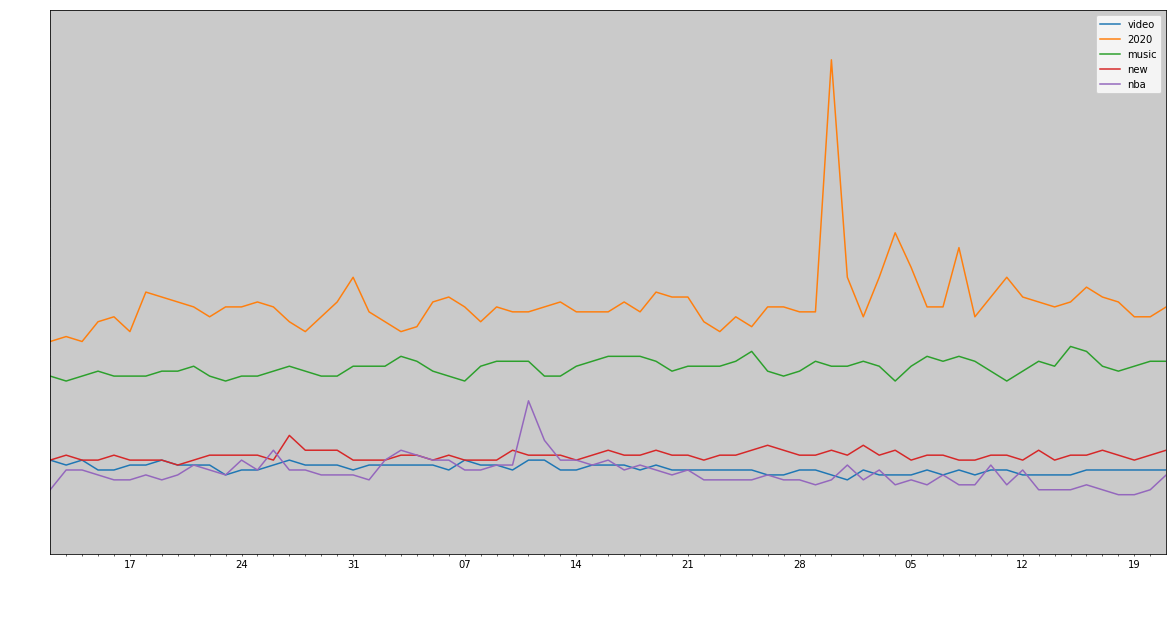

In [46]:
kw_list = df_tags['tags'].head(5).values.tolist()
timeframe='2020-08-12 2020-10-21'


pytrend.build_payload(kw_list, timeframe=timeframe, geo='US', gprop='youtube')
trends = pytrend.interest_over_time()
ax=trends.plot()


ax.set_xlabel('Date',color='white')
ax.set_ylabel('Searches',color='white')
ax.patch.set_facecolor('#cacacaff')
ax.tick_params(axis='x', colors='white')
ax.tick_params(axis='y', colors='white')
ax.set_ylim(0,110)  # ajust y axis range fo r numeric input
ax.set_yticks(np.arange(0, 110 + 1, 10))  # adjust the y tick frequency
ax.legend(bbox_to_anchor=(0.99, 12)) #customise the legend location

plt.legend()
plt.show()


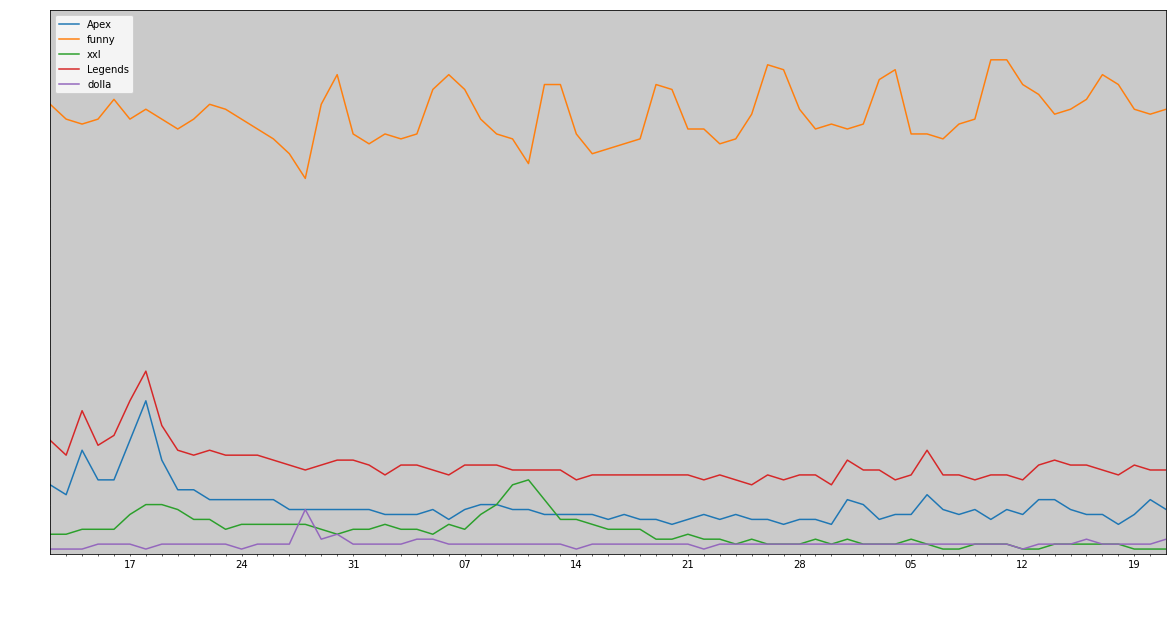

In [48]:
kw_list = ['Apex','funny', 'xxl', 'Legends','dolla']
timeframe='2020-08-12 2020-10-21'


pytrend.build_payload(kw_list, timeframe=timeframe, geo='US', gprop='youtube')
trends = pytrend.interest_over_time()
ax=trends.plot()



ax.set_xlabel('Date',color='white')
ax.set_ylabel('Searches',color='white')
ax.patch.set_facecolor('#cacacaff')
ax.tick_params(axis='x', colors='white')
ax.tick_params(axis='y', colors='white')
ax.set_ylim(0,110)  # ajust y axis range fo r numeric input
ax.set_yticks(np.arange(0, 110 + 1, 10))  # adjust the y tick frequency
ax.legend(bbox_to_anchor=(0.99, 12)) #customise the legend location

plt.legend()
plt.show()

# Time Series forcasting with ARMA on Apex

In [49]:
pytrend.build_payload(wordcloud_tags, timeframe=timeframe, geo='US', gprop='youtube')
trends = pytrend.interest_over_time()
trends = trends.set_index(pd.to_datetime(trends.index))

In [50]:
series = pd.Series(trends['Apex'].values, index = trends.index)


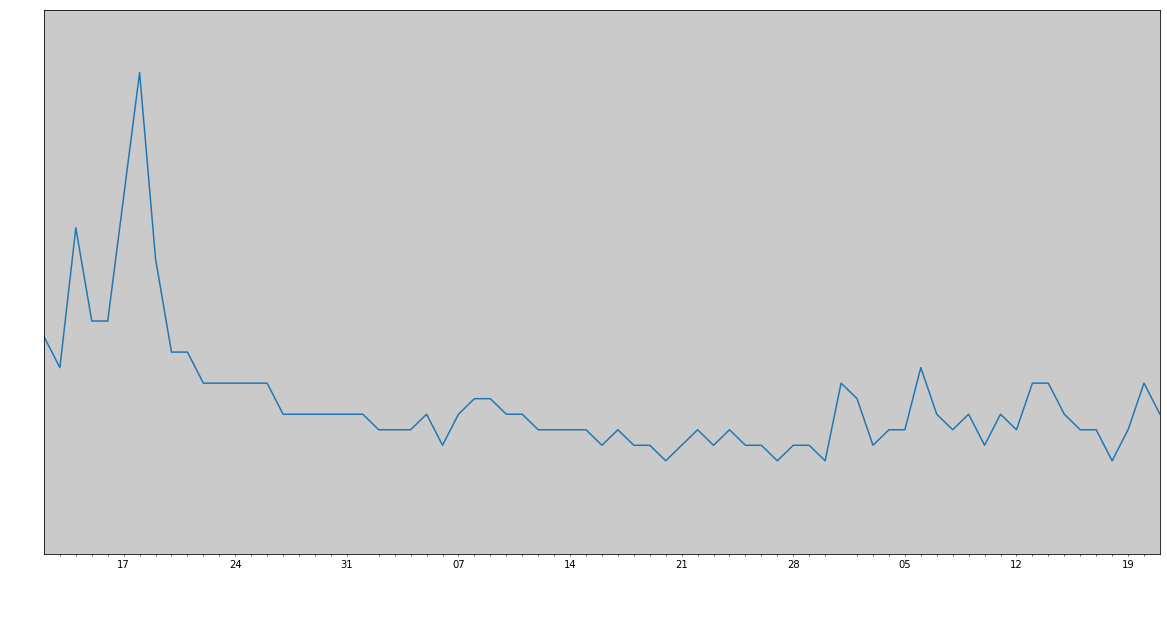

In [51]:
ax=series.plot()
ax.set_xlabel('Date',color='white')
ax.set_ylabel('Searches',color='white')
ax.patch.set_facecolor('#cacacaff')
ax.tick_params(axis='x', colors='white')
ax.tick_params(axis='y', colors='white')
ax.set_ylim(0,35)  # ajust y axis range fo r numeric input
ax.set_yticks(np.arange(0, 35 + 1, 5))  # adjust the y tick frequency
plt.show()

In [52]:
series = series.resample('d').sum()
series = series.cumsum()

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


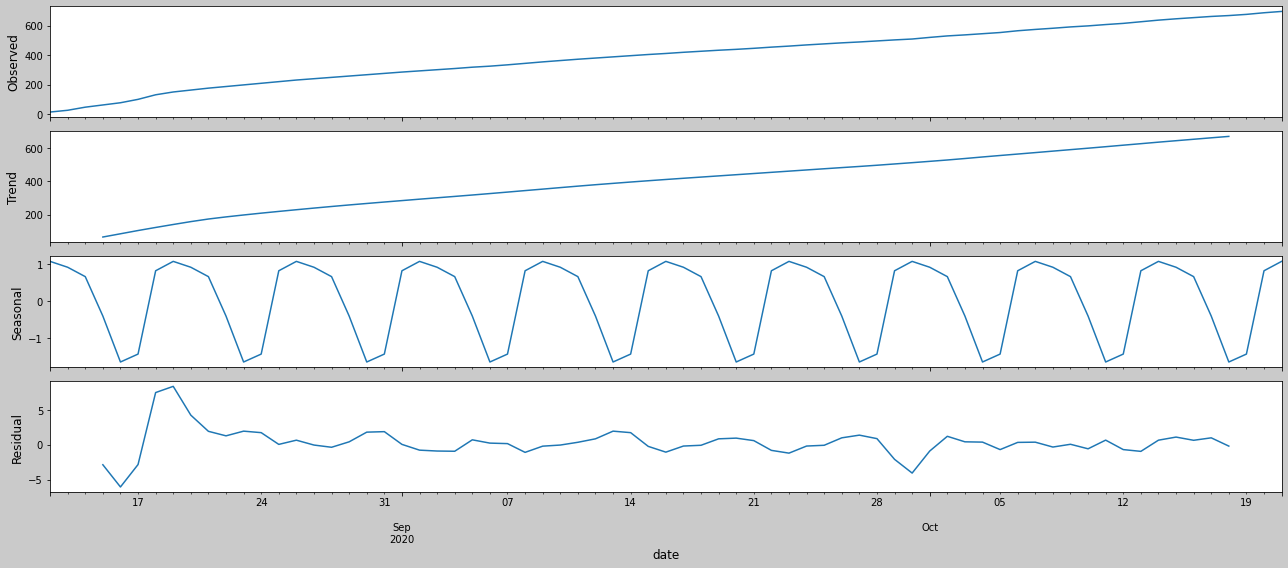

In [53]:
#The best part about time series data and decomposition is that you can break down the data into the following:
#Time Series Decomposition. 
from pylab import rcParams
import statsmodels.api as sm
rcParams['figure.figsize'] = 18, 8
decomposition = sm.tsa.seasonal_decompose(series, model='additive')
fig = decomposition.plot()
fig.patch.set_facecolor('#cacacaff')
plt.show()



In [54]:
#GRID SEARCH for Param Tuning.
#Sample params for seasonal arima. (SARIMAX).

#For each combination of parameters, we fit a new seasonal ARIMA model with the SARIMAX() function 
#from the statsmodels module and assess its overall quality.

import itertools
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 26) for x in list(itertools.product(p, d, q))]

In [55]:

#The code tests the given params using sarimax and outputs the AIC scores.

for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(series,order=param,seasonal_order=param_seasonal,enforce_stationarity=False,enforce_invertibility=False)

            results = mod.fit()

            print('SARIMA{}x{}26 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

SARIMA(0, 0, 0)x(0, 0, 0, 26)26 - AIC:1052.520986528463
SARIMA(0, 0, 0)x(0, 1, 0, 26)26 - AIC:603.5666116435734
SARIMA(0, 0, 0)x(1, 0, 0, 26)26 - AIC:562.0358419729698
SARIMA(0, 0, 0)x(1, 1, 0, 26)26 - AIC:195.38562312361438
SARIMA(0, 0, 1)x(0, 0, 0, 26)26 - AIC:950.308913181667
SARIMA(0, 0, 1)x(0, 1, 0, 26)26 - AIC:534.0938998398857
SARIMA(0, 0, 1)x(1, 0, 0, 26)26 - AIC:508.7799166212438
SARIMA(0, 0, 1)x(1, 1, 0, 26)26 - AIC:176.1430474680774
SARIMA(0, 1, 0)x(0, 0, 0, 26)26 - AIC:522.6719311415105
SARIMA(0, 1, 0)x(0, 1, 0, 26)26 - AIC:271.59328039310805
SARIMA(0, 1, 0)x(1, 0, 0, 26)26 - AIC:244.57550411114596
SARIMA(0, 1, 0)x(1, 1, 0, 26)26 - AIC:79.29858903346157
SARIMA(0, 1, 1)x(0, 0, 0, 26)26 - AIC:436.4236021838972
SARIMA(0, 1, 1)x(0, 1, 0, 26)26 - AIC:231.06862526835144
SARIMA(0, 1, 1)x(1, 0, 0, 26)26 - AIC:218.4132196974257
SARIMA(0, 1, 1)x(1, 1, 0, 26)26 - AIC:77.69077738911226
SARIMA(1, 0, 0)x(0, 0, 0, 26)26 - AIC:475.1112901794587
SARIMA(1, 0, 0)x(0, 1, 0, 26)26 - AIC:266.264

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMA(1, 0, 0)x(1, 0, 0, 26)26 - AIC:261.74998552278055
SARIMA(1, 0, 0)x(1, 1, 0, 26)26 - AIC:76.86807137330806
SARIMA(1, 0, 1)x(0, 0, 0, 26)26 - AIC:404.7622070417506
SARIMA(1, 0, 1)x(0, 1, 0, 26)26 - AIC:236.53282736637664


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMA(1, 0, 1)x(1, 0, 0, 26)26 - AIC:164.54688750403056
SARIMA(1, 0, 1)x(1, 1, 0, 26)26 - AIC:77.03697298465863
SARIMA(1, 1, 0)x(0, 0, 0, 26)26 - AIC:343.32167766579397
SARIMA(1, 1, 0)x(0, 1, 0, 26)26 - AIC:232.9435621246763


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMA(1, 1, 0)x(1, 0, 0, 26)26 - AIC:171.92906943314105
SARIMA(1, 1, 0)x(1, 1, 0, 26)26 - AIC:73.8784068485181
SARIMA(1, 1, 1)x(0, 0, 0, 26)26 - AIC:327.43719916611525
SARIMA(1, 1, 1)x(0, 1, 0, 26)26 - AIC:221.97111929493227
SARIMA(1, 1, 1)x(1, 0, 0, 26)26 - AIC:162.61897411000945
SARIMA(1, 1, 1)x(1, 1, 0, 26)26 - AIC:73.96817344177116


In [56]:
#Fit the model with the best params.
#sARIMA(1, 1, 0)x(1, 1, 0, 26)26 - AIC:73.04506154417959

#we should consider this to be optimal option.

from statsmodels.tsa.statespace.sarimax import SARIMAX
mod = sm.tsa.statespace.SARIMAX(series,
                                order=(1, 1, 0),
                                seasonal_order=(1, 1, 0, 26),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results = mod.fit()
print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4085      0.232      1.764      0.078      -0.045       0.862
ar.S.L26      -0.0448      0.151     -0.296      0.767      -0.341       0.251
sigma2         3.1738      1.483      2.140      0.032       0.267       6.080


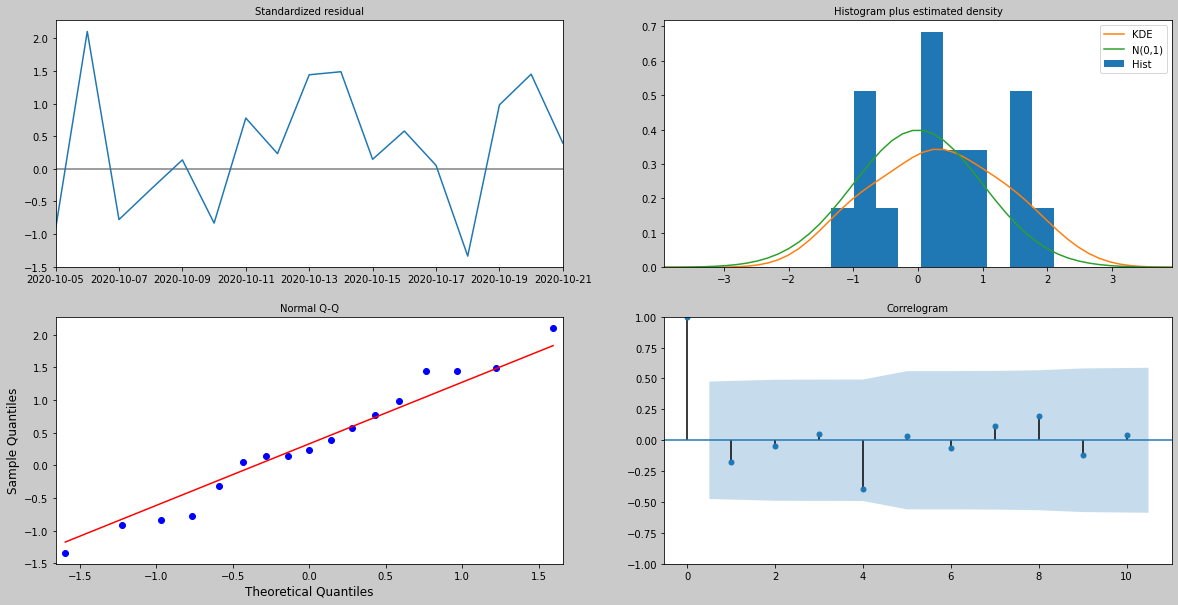

In [57]:
#Plotting the diagnostics.

#The plot_diagnostics object allows us to quickly generate model diagnostics and investigate for any unusual behavior.
fig=results.plot_diagnostics(figsize=(20,10))
fig.patch.set_facecolor('#cacacaff')
plt.show()


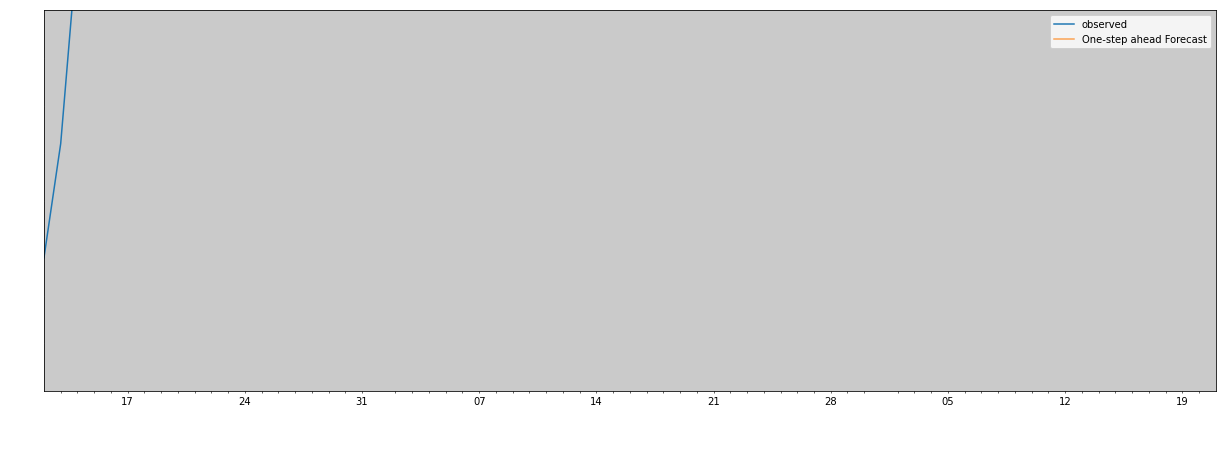

In [58]:
#Lets get the predictions and confidence interval for those predictions.
#Get the predictions. The forecasts start from the 1st of Jan 2017 but the previous line shows how it fits to the data.
pred = results.get_prediction(start=pd.to_datetime('2020-09-21'), dynamic=False) #false is when using the entire history.
#Confidence interval.
pred_ci = pred.conf_int(95)

#Plotting real and forecasted values.
ax = series.plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(21, 7))
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='blue', alpha=.2)
ax.set_xlabel('Date',color='white')
ax.set_ylabel('Searches',color='white')
ax.patch.set_facecolor('#cacacaff')
ax.tick_params(axis='x', colors='white')
ax.tick_params(axis='y', colors='white')

ax.set_ylim(0,40)  # ajust y axis range for numeric input
ax.set_yticks(np.arange(0, 40 + 1, 5))  # adjust the y tick frequency
ax.legend(bbox_to_anchor=(0.99, 12)) #customise the legend location
plt.legend()
plt.show()

#Takeaway: The forecats seems to be fitting well to the data. The Blue/purple thicker plot shows the confidence level in the forecasts. 

In [59]:
#Getting the mean squared error (average error of forecasts).
y_forecasted = pred.predicted_mean
y_truth = series['2020-09-22':]
mse = ((y_forecasted - y_truth) ** 2).mean()
print('MSE {}'.format(round(mse, 2)))

#Smaller the better.

MSE 3.09


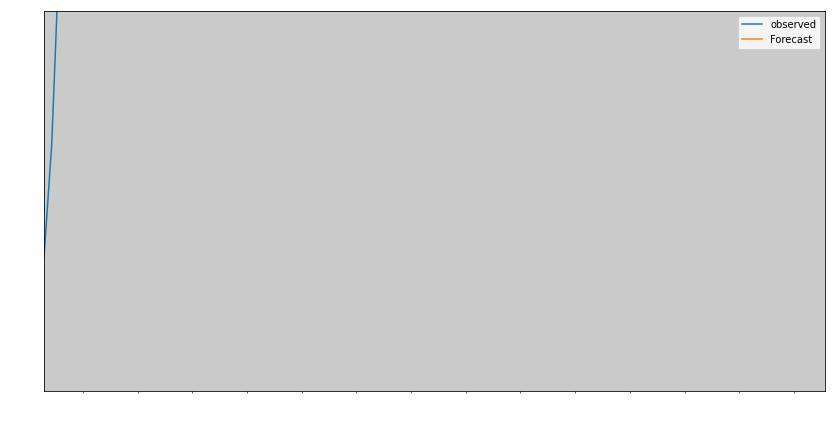

In [60]:
#The time can be changed using steps.
pred_uc = results.get_forecast(steps=30)
pred_ci = pred_uc.conf_int(95)
ax = series.plot(label='observed', figsize=(14, 7))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date',color='white')
ax.set_ylabel('Searches',color='white')
ax.patch.set_facecolor('#cacacaff')
ax.tick_params(axis='x', colors='white')
ax.tick_params(axis='y', colors='white')

ax.set_ylim(0,40)  # ajust y axis range for numeric input
ax.set_yticks(np.arange(0, 40 + 1, 5))  # adjust the y tick frequency
ax.legend(bbox_to_anchor=(0.99, 12)) #customise the legend location
plt.legend()
plt.show()


# Time Series forcasting with ARMA on dolla

In [ ]:
kw_list=['dolla']
pytrend.build_payload(kw_list, timeframe=timeframe, geo='US', gprop='youtube')
trends = pytrend.interest_over_time()
trends = trends.set_index(pd.to_datetime(trends.index))

In [ ]:
series = pd.Series(trends['dolla'].values, index = trends.index)


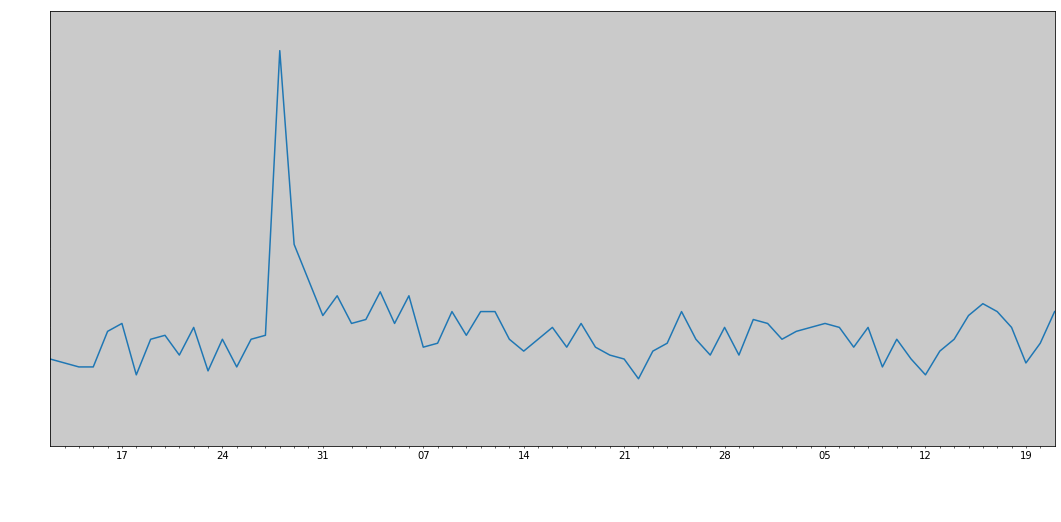

In [ ]:

ax=series.plot()
ax.set_xlabel('Date',color='white')
ax.set_ylabel('Searches',color='white')
ax.patch.set_facecolor('#cacacaff')
ax.tick_params(axis='x', colors='white')
ax.tick_params(axis='y', colors='white')
ax.set_ylim(0,110)  # ajust y axis range fo r numeric input
ax.set_yticks(np.arange(0, 110 + 1, 10))  # adjust the y tick frequency
plt.show()


In [ ]:
series = series.resample('d').sum()
series = series.cumsum()

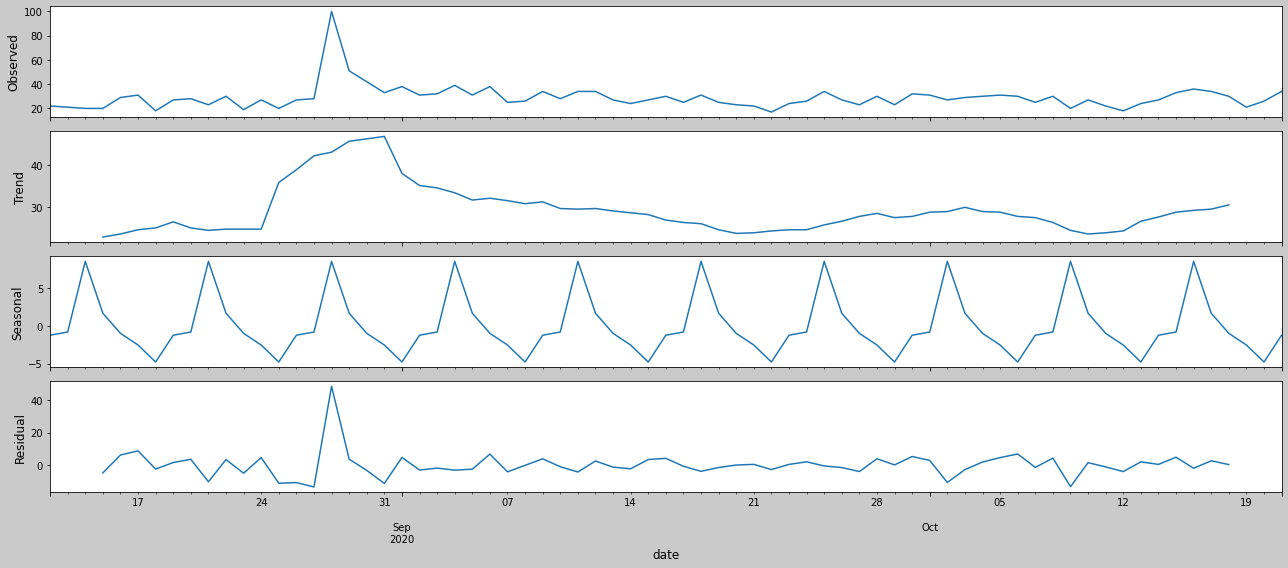

In [ ]:
#The best part about time series data and decomposition is that you can break down the data into the following:
#Time Series Decomposition. 

rcParams['figure.figsize'] = 18, 8
decomposition = sm.tsa.seasonal_decompose(series, model='additive')
fig = decomposition.plot()
fig.patch.set_facecolor('#cacacaff')
plt.show()

In [ ]:
#GRID SEARCH for Param Tuning.
#Sample params for seasonal arima. (SARIMAX).

#For each combination of parameters, we fit a new seasonal ARIMA model with the SARIMAX() function 
#from the statsmodels module and assess its overall quality.

import itertools
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 26) for x in list(itertools.product(p, d, q))]

In [ ]:

#The code tests the given params using sarimax and outputs the AIC scores.

for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(series,order=param,seasonal_order=param_seasonal,enforce_stationarity=False,enforce_invertibility=False)

            results = mod.fit()

            print('SARIMA{}x{}26 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred f

SARIMA(0, 0, 0)x(0, 0, 0, 26)26 - AIC:681.1416613673202
SARIMA(0, 0, 0)x(0, 1, 0, 26)26 - AIC:359.52002680266
SARIMA(0, 0, 0)x(1, 0, 0, 26)26 - AIC:354.83195405638014
SARIMA(0, 0, 0)x(1, 1, 0, 26)26 - AIC:131.95901613711044
SARIMA(0, 0, 1)x(0, 0, 0, 26)26 - AIC:623.1906050507254
SARIMA(0, 0, 1)x(0, 1, 0, 26)26 - AIC:347.99179562594713


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred f

SARIMA(0, 0, 1)x(1, 0, 0, 26)26 - AIC:346.8933319257962


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMA(0, 0, 1)x(1, 1, 0, 26)26 - AIC:131.31076525644772
SARIMA(0, 1, 0)x(0, 0, 0, 26)26 - AIC:541.8123888999405
SARIMA(0, 1, 0)x(0, 1, 0, 26)26 - AIC:358.33744466130497
SARIMA(0, 1, 0)x(1, 0, 0, 26)26 - AIC:275.6593989717604


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred f

SARIMA(0, 1, 0)x(1, 1, 0, 26)26 - AIC:126.77118863890333
SARIMA(0, 1, 1)x(0, 0, 0, 26)26 - AIC:517.1373606157586
SARIMA(0, 1, 1)x(0, 1, 0, 26)26 - AIC:342.7395727190963


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred f

SARIMA(0, 1, 1)x(1, 0, 0, 26)26 - AIC:269.25567382102764


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMA(0, 1, 1)x(1, 1, 0, 26)26 - AIC:126.23681481234415
SARIMA(1, 0, 0)x(0, 0, 0, 26)26 - AIC:548.2762135197321
SARIMA(1, 0, 0)x(0, 1, 0, 26)26 - AIC:352.71770524749024
SARIMA(1, 0, 0)x(1, 0, 0, 26)26 - AIC:277.50450589576053


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred f

SARIMA(1, 0, 0)x(1, 1, 0, 26)26 - AIC:123.51940505028809
SARIMA(1, 0, 1)x(0, 0, 0, 26)26 - AIC:526.0803799791826
SARIMA(1, 0, 1)x(0, 1, 0, 26)26 - AIC:347.262878489844


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred f

SARIMA(1, 0, 1)x(1, 0, 0, 26)26 - AIC:271.1492842181894


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMA(1, 0, 1)x(1, 1, 0, 26)26 - AIC:125.28127273070025
SARIMA(1, 1, 0)x(0, 0, 0, 26)26 - AIC:531.6744606203536
SARIMA(1, 1, 0)x(0, 1, 0, 26)26 - AIC:354.377331157569
SARIMA(1, 1, 0)x(1, 0, 0, 26)26 - AIC:267.88147231798143


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred f

SARIMA(1, 1, 0)x(1, 1, 0, 26)26 - AIC:119.98488368921804
SARIMA(1, 1, 1)x(0, 0, 0, 26)26 - AIC:515.1262952257123


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMA(1, 1, 1)x(0, 1, 0, 26)26 - AIC:342.3162707352784


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMA(1, 1, 1)x(1, 0, 0, 26)26 - AIC:261.71024823627585


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



SARIMA(1, 1, 1)x(1, 1, 0, 26)26 - AIC:121.36904080473273


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



In [ ]:
#Fit the model with the best params.
#SARIMA(1, 0, 0)x(1, 1, 0, 26)26 - AIC:21.556149774034893

#we should consider this to be optimal option.

from statsmodels.tsa.statespace.sarimax import SARIMAX
mod = sm.tsa.statespace.SARIMAX(series,
                                order=(1, 1, 0),
                                seasonal_order=(1, 1, 0, 26),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results = mod.fit()
print(results.summary().tables[1])

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4023      0.237     -1.698      0.089      -0.867       0.062
ar.S.L26       0.0911      0.070      1.293      0.196      -0.047       0.229
sigma2        47.8041     24.328      1.965      0.049       0.122      95.486


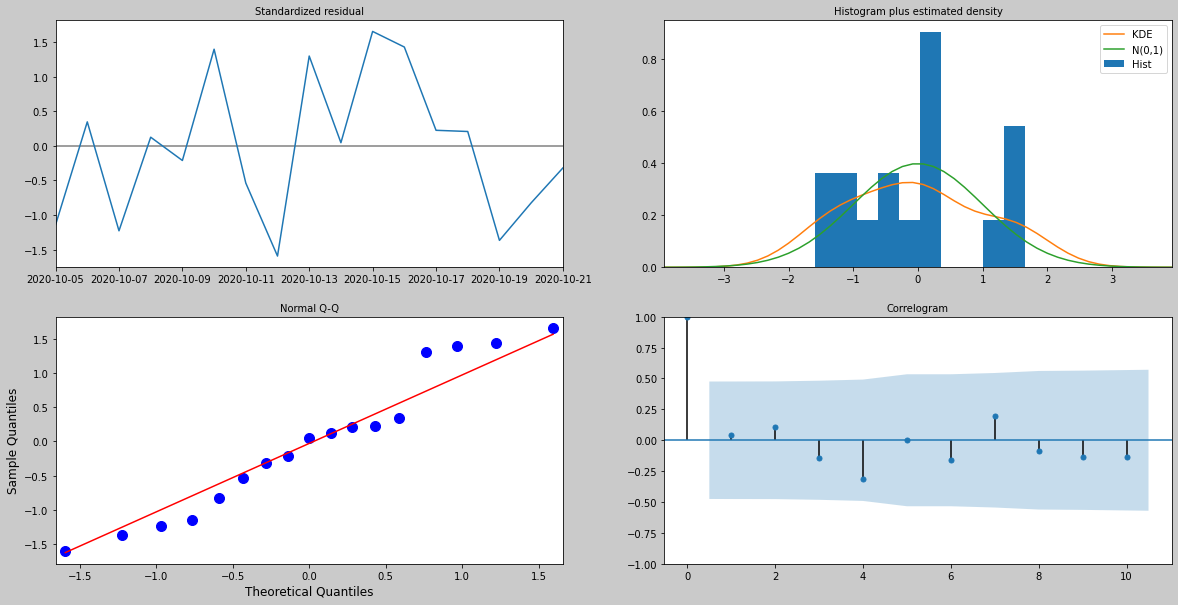

In [ ]:
#Plotting the diagnostics.

#The plot_diagnostics object allows us to quickly generate model diagnostics and investigate for any unusual behavior.
fig=results.plot_diagnostics(figsize=(20,10))
fig.patch.set_facecolor('#cacacaff')
plt.show()


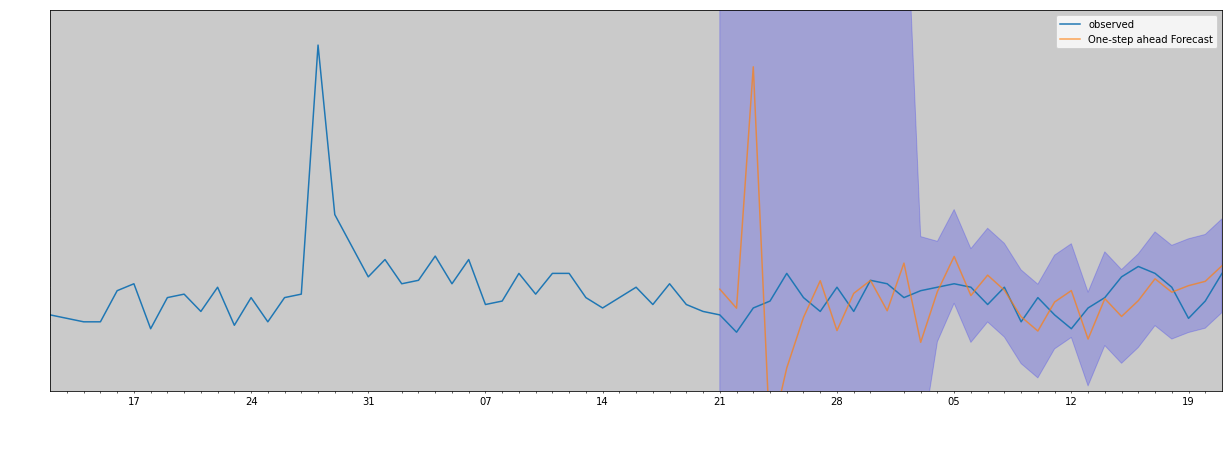

In [ ]:
#Lets get the predictions and confidence interval for those predictions.
#Get the predictions. The forecasts start from the 1st of Jan 2017 but the previous line shows how it fits to the data.
pred = results.get_prediction(start=pd.to_datetime('2020-09-21'), dynamic=False) #false is when using the entire history.
#Confidence interval.
pred_ci = pred.conf_int(95)

#Plotting real and forecasted values.
ax = series.plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(21, 7))
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='blue', alpha=.2)
ax.set_xlabel('Date',color='white')
ax.set_ylabel('Searches',color='white')
ax.patch.set_facecolor('#cacacaff')
ax.tick_params(axis='x', colors='white')
ax.tick_params(axis='y', colors='white')

ax.set_ylim(0,110)  # ajust y axis range for numeric input
ax.set_yticks(np.arange(0, 110 + 1, 10))  # adjust the y tick frequency
ax.legend(bbox_to_anchor=(0.99, 12)) #customise the legend location
plt.legend()
plt.show()

#Takeaway: The forecats seems to be fitting well to the data. The Blue/purple thicker plot shows the confidence level in the forecasts. 

In [ ]:
#Getting the mean squared error (average error of forecasts).
y_forecasted = pred.predicted_mean
y_truth = series['2020-09-22':]
mse = ((y_forecasted - y_truth) ** 2).mean()
print('MSE {}'.format(round(mse, 2)))

#Smaller the better.

MSE 235.87


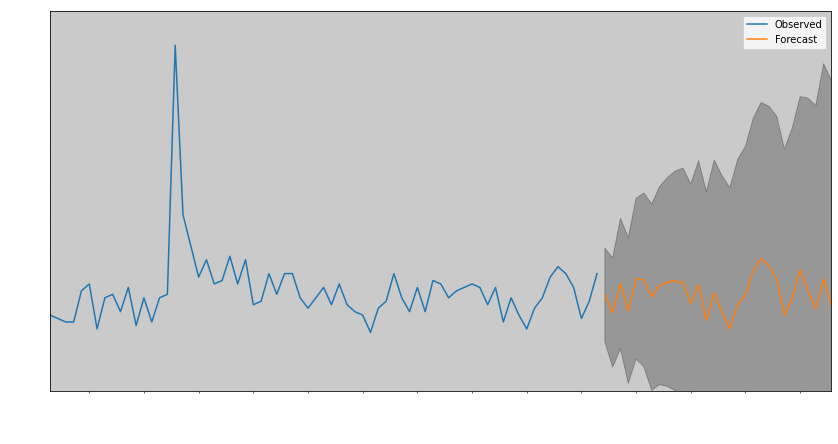

In [ ]:
#The time can be changed using steps.
pred_uc = results.get_forecast(steps=30)
pred_ci = pred_uc.conf_int(95)
ax = series.plot(label='Observed', figsize=(14, 7))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date',color='white')
ax.set_ylabel('Searches',color='white')
ax.patch.set_facecolor('#cacacaff')
ax.tick_params(axis='x', colors='white')
ax.tick_params(axis='y', colors='white')

ax.set_ylim(0,110)  # ajust y axis range for numeric input
ax.set_yticks(np.arange(0, 110 + 1, 10))  # adjust the y tick frequency
ax.legend(bbox_to_anchor=(0.99, 12)) #customise the legend location
plt.legend()
plt.show()




# Hourly data on same features

**timeframe**

Date to start from

Defaults to last 5yrs, 'today 5-y'.

Everything 'all'

Specific dates, 'YYYY-MM-DD YYYY-MM-DD' example '2016-12-14 2017-01-25'

Specific datetimes, 'YYYY-MM-DDTHH YYYY-MM-DDTHH' example '2017-02-06T10 2017-02-12T07'

Note Time component is based off UTC
Current Time Minus Time Pattern:

By Month: 'today #-m' where # is the number of months from that date to pull data for

For example: 'today 3-m' would get data from today to 3months ago
NOTE Google uses UTC date as 'today'
Seems to only work for 1, 2, 3 months only
Daily: 'now #-d' where # is the number of days from that date to pull data for

For example: 'now 7-d' would get data from the last week
Seems to only work for 1, 7 days only
Hourly: 'now #-H' where # is the number of hours from that date to pull data for

For example: 'now 1-H' would get data from the last hour
Seems to only work for 1, 4 hours only

**kw_list**

keywords to get data for

Example ['Pizza']

Up to five terms in a list: ['Pizza', 'Italian', 'Spaghetti', 'Breadsticks', 'Sausage']

Advanced Keywords

When using Google Trends dashboard Google may provide suggested narrowed search terms.
For example "iron" will have a drop down of "Iron Chemical Element, Iron Cross, Iron Man, etc".
Find the encoded topic by using the get_suggestions() function and choose the most relevant one for you.
For example: https://www.google.com/trends/explore#q=%2Fm%2F025rw19&cmpt=q
"%2Fm%2F025rw19" is the topic "Iron Chemical Element" to use this with pytrends
You can also use pytrends.suggestions() to automate this.

**gprop**

What Google property to filter to
Example 'images'
Defaults to web searches
Can be images, news, youtube or froogle (for Google Shopping results)

Below is the format for building payloads for the pytrends API

```
#kw_list = ["Blockchain"]
pytrends.build_payload(kw_list, cat=0, timeframe='today 5-y', geo='', gprop='')
```



In [ ]:
kw_list = df_tags['tags'].head(5).values.tolist()
print(kw_list)


['video', '2020', 'music', 'new', 'nba']


In [ ]:

def newtrend(kw_list,timeframe):
  ax=trends.plot()
  plt.legend()
  plt.show()


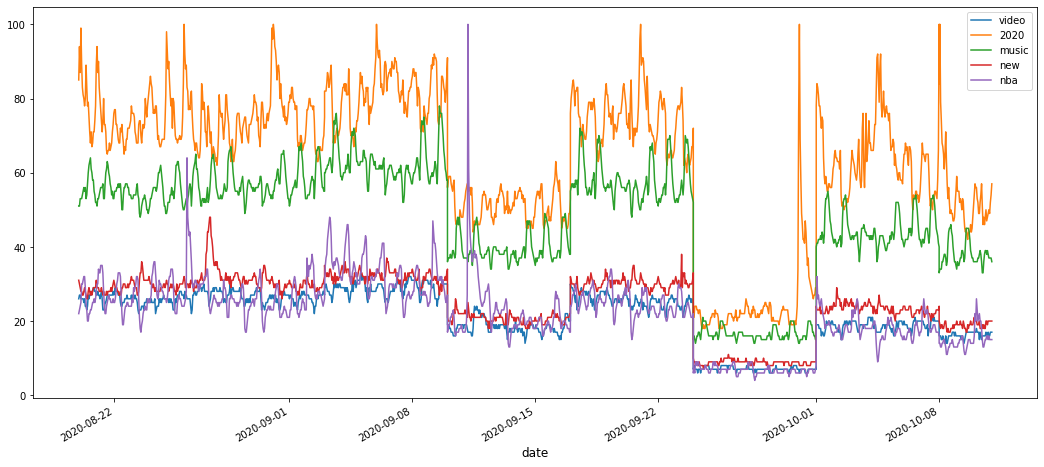

In [ ]:
kw_list = df_tags['tags'].head(5).values.tolist()
timeframe='2020-08-12 2020-10-21'
trends = pytrend.get_historical_interest(kw_list, year_start=2020, month_start=8, day_start=20, hour_start=0, year_end=2020, month_end=10, day_end=11, hour_end=0, geo='US', gprop='youtube')
newtrend(kw_list,timeframe)

ax.set_xlabel('Date',color='white')
ax.set_ylabel('Searches',color='white')
ax.patch.set_facecolor('#cacacaff')
ax.tick_params(axis='x', colors='white')
ax.tick_params(axis='y', colors='white')
ax.set_ylim(0,110)  # ajust y axis range fo r numeric input
ax.set_yticks(np.arange(0, 110 + 1, 10))  # adjust the y tick frequency
ax.legend(bbox_to_anchor=(0.99, 12)) #customise the legend location

HTTPSConnectionPool(host='trends.google.com', port=443): Read timed out. (read timeout=5)


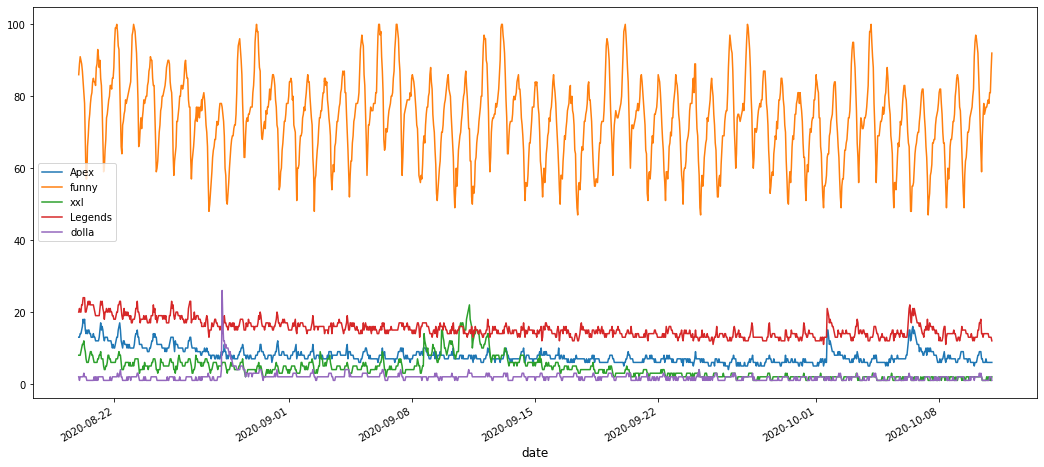

In [ ]:
kw_list = ['Apex','funny', 'xxl', 'Legends','dolla']
timeframe='2020-08-12 2020-10-21'
trends = pytrend.get_historical_interest(kw_list, year_start=2020, month_start=8, day_start=13, hour_start=0, year_end=2020, month_end=10, day_end=21, hour_end=0, geo='US', gprop='youtube')
newtrend(kw_list , timeframe)

ax.set_xlabel('Date',color='white')
ax.set_ylabel('Searches',color='white')
ax.patch.set_facecolor('#cacacaff')
ax.tick_params(axis='x', colors='white')
ax.tick_params(axis='y', colors='white')
ax.set_ylim(0,110)  # ajust y axis range fo r numeric input
ax.set_yticks(np.arange(0, 110 + 1, 10))  # adjust the y tick frequency
ax.legend(bbox_to_anchor=(0.99, 12)) #customise the legend location

In [ ]:
series = pd.Series(trends['Apex'].values, index = trends.index)


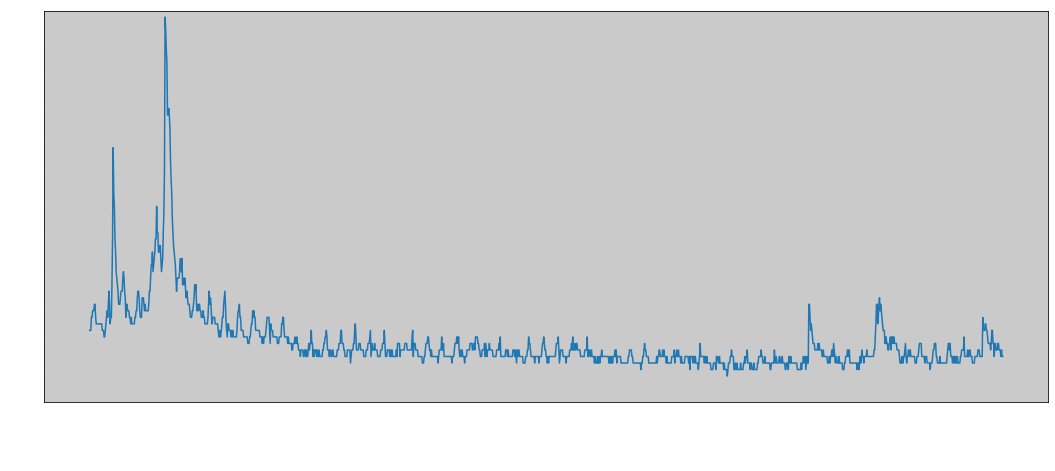

In [ ]:
ax=series.plot()
ax.set_xlabel('Date',color='white')
ax.set_ylabel('Searches',color='white')
ax.patch.set_facecolor('#cacacaff')
ax.tick_params(axis='x', colors='white')
ax.tick_params(axis='y', colors='white')
ax.set_ylim(0,60)  # ajust y axis range fo r numeric input
ax.set_yticks(np.arange(0, 60 + 1, 5))  # adjust the y tick frequency
plt.show()

In [ ]:
series = series.resample('4h').sum()
series = series.cumsum()

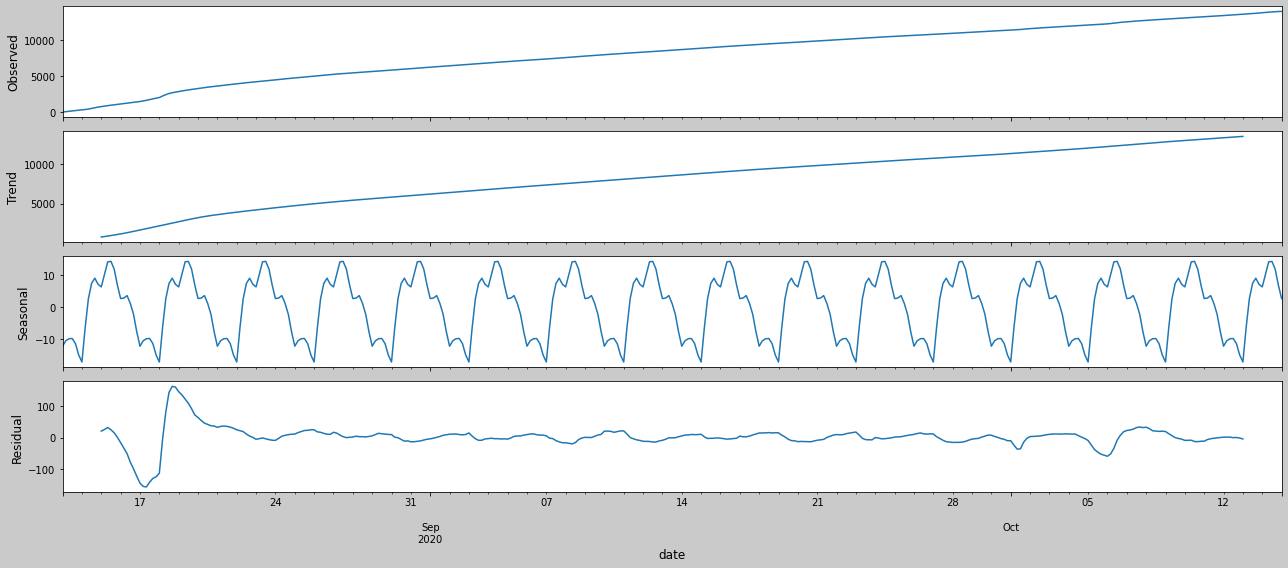

In [ ]:
#The best part about time series data and decomposition is that you can break down the data into the following:
#Time Series Decomposition. 
from pylab import rcParams
import statsmodels.api as sm
rcParams['figure.figsize'] = 18, 8
decomposition = sm.tsa.seasonal_decompose(series, model='additive')
fig = decomposition.plot()
fig.patch.set_facecolor('#cacacaff')
plt.show()



In [ ]:
#GRID SEARCH for Param Tuning.
#Sample params for seasonal arima. (SARIMAX).

#For each combination of parameters, we fit a new seasonal ARIMA model with the SARIMAX() function 
#from the statsmodels module and assess its overall quality.

import itertools
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 26) for x in list(itertools.product(p, d, q))]

In [ ]:

#The code tests the given params using sarimax and outputs the AIC scores.

for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(series_stat,order=param,seasonal_order=param_seasonal,enforce_stationarity=False,enforce_invertibility=False)

            results = mod.fit()

            print('SARIMA{}x{}26 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

SARIMA(0, 0, 0)x(0, 0, 0, 26)26 - AIC:11407.061725542259
SARIMA(0, 0, 0)x(0, 0, 1, 26)26 - AIC:9994.812093660148
SARIMA(0, 0, 0)x(0, 1, 0, 26)26 - AIC:8701.816330475223
SARIMA(0, 0, 0)x(0, 1, 1, 26)26 - AIC:8167.895537486851
SARIMA(0, 0, 0)x(1, 0, 0, 26)26 - AIC:8629.173757612622
SARIMA(0, 0, 0)x(1, 0, 1, 26)26 - AIC:8339.173247408178
SARIMA(0, 0, 0)x(1, 1, 0, 26)26 - AIC:8312.985550604773
SARIMA(0, 0, 0)x(1, 1, 1, 26)26 - AIC:8186.306316470002
SARIMA(0, 0, 1)x(0, 0, 0, 26)26 - AIC:9643.801402415274
SARIMA(0, 0, 1)x(0, 0, 1, 26)26 - AIC:8550.718660274615
SARIMA(0, 0, 1)x(0, 1, 0, 26)26 - AIC:7557.40756145057
SARIMA(0, 0, 1)x(0, 1, 1, 26)26 - AIC:6960.349661440932
SARIMA(0, 0, 1)x(1, 0, 0, 26)26 - AIC:7466.739073542536
SARIMA(0, 0, 1)x(1, 0, 1, 26)26 - AIC:7092.411528862116
SARIMA(0, 0, 1)x(1, 1, 0, 26)26 - AIC:7156.155344149147
SARIMA(0, 0, 1)x(1, 1, 1, 26)26 - AIC:6998.99194080346
SARIMA(0, 1, 0)x(0, 0, 0, 26)26 - AIC:5453.776877379676
SARIMA(0, 1, 0)x(0, 0, 1, 26)26 - AIC:5378.286758

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMA(1, 0, 0)x(0, 1, 0, 26)26 - AIC:6275.736519828876
SARIMA(1, 0, 0)x(0, 1, 1, 26)26 - AIC:5263.7411778968435
SARIMA(1, 0, 0)x(1, 0, 0, 26)26 - AIC:5375.5181397590295
SARIMA(1, 0, 0)x(1, 0, 1, 26)26 - AIC:5344.451075196187
SARIMA(1, 0, 0)x(1, 1, 0, 26)26 - AIC:5716.017565328431
SARIMA(1, 0, 0)x(1, 1, 1, 26)26 - AIC:5265.7410328771475
SARIMA(1, 0, 1)x(0, 0, 0, 26)26 - AIC:5431.230552923091
SARIMA(1, 0, 1)x(0, 0, 1, 26)26 - AIC:5354.21183155048
SARIMA(1, 0, 1)x(0, 1, 0, 26)26 - AIC:6264.491290118056
SARIMA(1, 0, 1)x(0, 1, 1, 26)26 - AIC:5241.865815138534
SARIMA(1, 0, 1)x(1, 0, 0, 26)26 - AIC:5358.2674472427825
SARIMA(1, 0, 1)x(1, 0, 1, 26)26 - AIC:5320.641686241315
SARIMA(1, 0, 1)x(1, 1, 0, 26)26 - AIC:5704.049261887215
SARIMA(1, 0, 1)x(1, 1, 1, 26)26 - AIC:5243.865597615233
SARIMA(1, 1, 0)x(0, 0, 0, 26)26 - AIC:5433.711239834133
SARIMA(1, 1, 0)x(0, 0, 1, 26)26 - AIC:5357.51093507794
SARIMA(1, 1, 0)x(0, 1, 0, 26)26 - AIC:6324.061494982303
SARIMA(1, 1, 0)x(0, 1, 1, 26)26 - AIC:5260.434

In [ ]:
#Fit the model with the best params.
#SARIMA(1, 0, 1)x(0, 1, 1, 26)26 - AIC:5241.865815138534

#we should consider this to be optimal option.

from statsmodels.tsa.statespace.sarimax import SARIMAX
mod = sm.tsa.statespace.SARIMAX(series,
                                order=(1, 0, 1),
                                seasonal_order=(0, 1, 1, 26),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results = mod.fit()
print(results.summary().tables[1])

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9952      0.001   1863.757      0.000       0.994       0.996
ma.L1          1.4572      0.062     23.616      0.000       1.336       1.578
ma.S.L26      -0.5449      0.023    -23.680      0.000      -0.590      -0.500
sigma2        34.8691      3.734      9.338      0.000      27.550      42.188


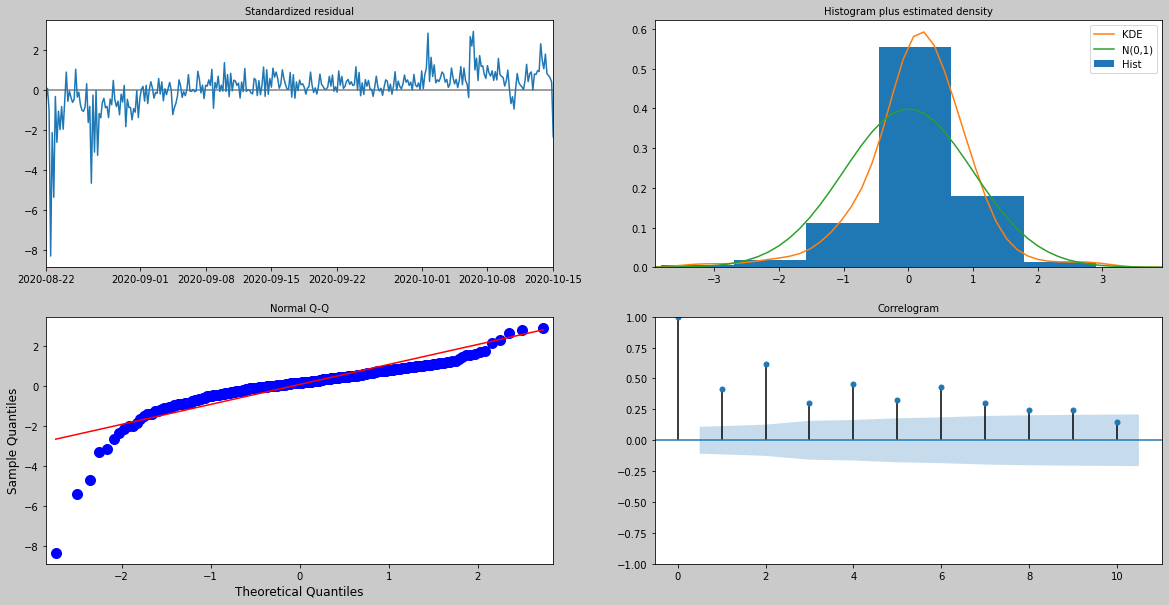

In [ ]:
#Plotting the diagnostics.

#The plot_diagnostics object allows us to quickly generate model diagnostics and investigate for any unusual behavior.
fig=results.plot_diagnostics(figsize=(20,10))
fig.patch.set_facecolor('#cacacaff')
plt.show()


In [ ]:
series

date
2020-08-13 00:00:00       46
2020-08-13 04:00:00      101
2020-08-13 08:00:00      156
2020-08-13 12:00:00      204
2020-08-13 16:00:00      252
                       ...  
2020-10-14 08:00:00    13810
2020-10-14 12:00:00    13843
2020-10-14 16:00:00    13877
2020-10-14 20:00:00    13907
2020-10-15 00:00:00    13914
Freq: 4H, Length: 379, dtype: int64

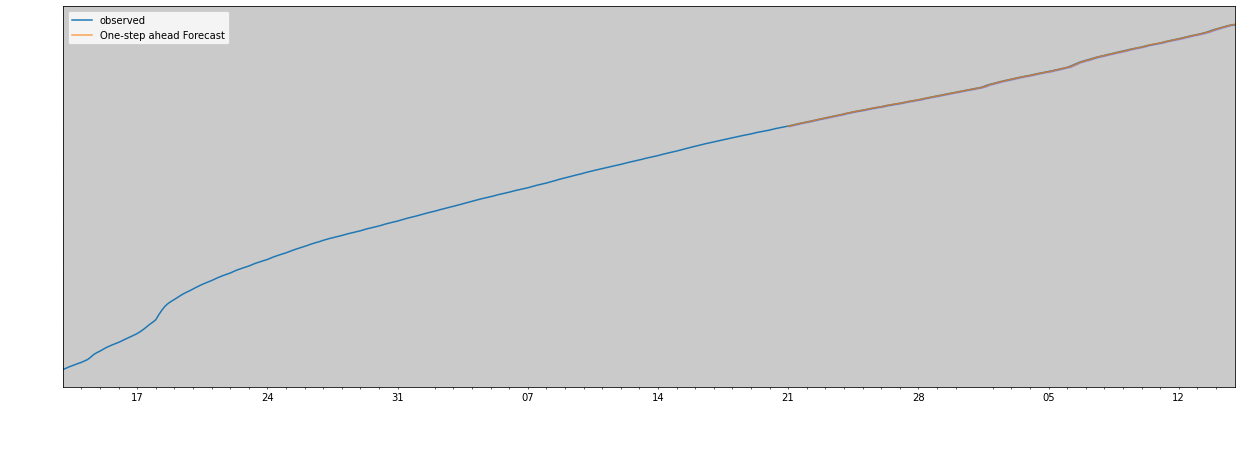

In [ ]:
#Lets get the predictions and confidence interval for those predictions.
#Get the predictions. The forecasts start from the 1st of Jan 2017 but the previous line shows how it fits to the data.
pred = results.get_prediction(start=pd.to_datetime('2020-09-21'), dynamic=False) #false is when using the entire history.
#Confidence interval.
pred_ci = pred.conf_int(95)

#Plotting real and forecasted values.
ax = series.plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(21, 7))
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='blue', alpha=.2)
ax.set_xlabel('Date',color='white')
ax.set_ylabel('Searches',color='white')
ax.patch.set_facecolor('#cacacaff')
ax.tick_params(axis='x', colors='white')
ax.tick_params(axis='y', colors='white')

#ax.set_ylim(0,100)  # ajust y axis range for numeric input
#ax.set_yticks(np.arange(0, 40 + 1, 5))  # adjust the y tick frequency
ax.legend(bbox_to_anchor=(0.99, 12)) #customise the legend location
plt.legend()
plt.show()

#Takeaway: The forecats seems to be fitting well to the data. The Blue/purple thicker plot shows the confidence level in the forecasts. 

In [ ]:
#Getting the mean squared error (average error of forecasts).
y_forecasted = pred.predicted_mean
y_truth = series['2020-09-22':]
mse = ((y_forecasted - y_truth) ** 2).mean()
print('MSE {}'.format(round(mse, 2)))

#Smaller the better.

MSE 1.54


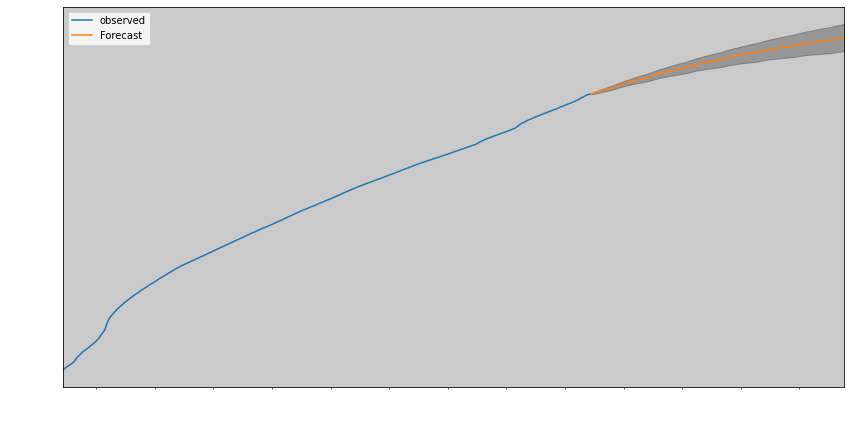

In [ ]:
#The time can be changed using steps.
pred_uc = results.get_forecast(steps=182)
pred_ci = pred_uc.conf_int(95)
ax = series.plot(label='observed', figsize=(14, 7))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date',color='white')
ax.set_ylabel('Searches',color='white')
ax.patch.set_facecolor('#cacacaff')
ax.tick_params(axis='x', colors='white')
ax.tick_params(axis='y', colors='white')

#ax.set_ylim(0,40)  # ajust y axis range for numeric input
#ax.set_yticks(np.arange(0, 40 + 1, 5))  # adjust the y tick frequency
ax.legend(bbox_to_anchor=(0.99, 12)) #customise the legend location
plt.legend()
plt.show()
